In [ ]:
!pip install tensorflow==1.14.0
!pip install tensorflow-gpu==1.14.0

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'/device:GPU:0'

## Import all the necessary packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import packages
import warnings  
with warnings.catch_warnings():  
    warnings.filterwarnings("ignore",category=FutureWarning)
import tensorflow as tf
import numpy as np
import re
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
%load_ext tensorboard

## Getting the data

In [ ]:
!wget http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip
!unzip cornell_movie_dialogs_corpus.zip

--2021-05-10 17:18:42--  http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9916637 (9.5M) [application/zip]
Saving to: ‘cornell_movie_dialogs_corpus.zip’

cornell_movie_dialo 100%[===================>]   9.46M  4.88MB/s    in 1.9s    

2021-05-10 17:18:45 (4.88 MB/s) - ‘cornell_movie_dialogs_corpus.zip’ saved [9916637/9916637]

Archive:  cornell_movie_dialogs_corpus.zip
   creating: cornell movie-dialogs corpus/
  inflating: cornell movie-dialogs corpus/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cornell movie-dialogs corpus/
  inflating: __MACOSX/cornell movie-dialogs corpus/._.DS_Store  
  inflating: cornell movie-dialogs corpus/chameleons.pdf  
  inflating: __MACOSX/cornell movie-dialogs corpus/._chameleons.pdf  
  inflating: cornell movie-

# Preprocessing or Data_Utils
<b>Step 1:</b>
Read from 'movie_conversations.txt'
Create a list of [list of line_id's]

Output Ex:['L194', 'L195', 'L196', 'L197']

<b>Step 2:</b>
Read from 'movie-lines.txt'
Create a dictionary with ( key = line_id, value = text )

Ex:
They do not!

They do to!

I hope so.

She okay?

Let's go.

Wow

Okay -- you're gonna need to learn how to lie.

No

I'm kidding.  You know how sometimes you just become this "persona"?  And you don't know how to quit?

Like my fear of wearing pastels?

<b>Step 3:</b>
Get lists of all conversations as Questions and Answers
 [questions]
 [answers]   

Question and answers are come from same conversation.As because there will be a question with the response.

Ex: For our first conversation

Q Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.

A Well, I thought we'd start with pronunciation, if that's okay with you.

Q Well, I thought we'd start with pronunciation, if that's okay with you.

A Not the hacking and gagging and spitting part.  Please.

Q Not the hacking and gagging and spitting part.  Please.

A Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?


<b>Step 4:</b>
Clean Text:
Text to lowercase 
Replacing certain words as follow:

Ex:   
    
    text = re.sub(r"i'm", "i am", text)
    
    text = re.sub(r"he's", "he is", text)
    
    text = re.sub(r"she's", "she is", text)
    
    text = re.sub(r"it's", "it is", text)
    
    text = re.sub(r"that's", "that is", text)
    
    text = re.sub(r"\'ll", " will", text)
    
    text = re.sub(r"\'ve", " have", text)
    
    text = re.sub(r"\'re", " are", text)
    
    text = re.sub(r"\'re", " are", text)
    
    text = re.sub(r"can't", "cannot", text)

<b>Step 5:</b>

Filter out the Questions  and Answers that are too short/long

Minimum&Maximum  length are 2&5

<b>Step 6:</b>

Get each word and its count  from filtered questions and answers in vocab dictionary

Get each word and its count  from filtered questions and answers in Question and Answer vocab dictionary 

<b>Step 7:</b>

Create vocabulary index with total number of words appear more than 2 times in vocab dictionary
	
    6281 words which appear more appear more than 2 times 

<b>Step 8:</b>

For each codes(<EOS>,<PAD>,<UNK><GO>) ,increment vocabulary index to 1 for each existing code 
Same for question and answer vocab.
	
    Now vocab index will be 6285

<b>Step 9:</b>

Create index vocabulary from vocabulary index dictionary 
	
    index vocabulary dict_items([(0, 'what'), (1, 'good'), (2, 'stuff'), (3, 'she'), (4, 'okay'), (5, 'they'),......
	......., (6283, '<PAD>'), (6284, '<EOS>'), (6285, '<UNK>'), (6286, '<GO>')])

<b>Step 10:</b>

Add EOS tag at the end of each answer 	
	Ex: the real you   -->   the real you <EOS>

<b>Step 11:</b>

Again filter out words in by comparing words in filtered question  and words in vocabulary index
Do the same for filtered answer 


In [ ]:
!mv "/content/cornell movie-dialogs corpus/movie_conversations.txt" "/content/Datasets/"

In [ ]:
!mv "/content/cornell movie-dialogs corpus/movie_lines.txt" "/content/Datasets/"

In [ ]:
!rm -rf "/content/cornell movie-dialogs corpus/"

In [ ]:
#get the conversation and movie data
movie_line = "/content/Datasets/movie_lines.txt"
movie_convo = "/content/Datasets/movie_conversations.txt"

m_lines = open(movie_line , encoding='utf-8',errors='ignore').read().split('\n')
c_lines = open(movie_convo , encoding='utf-8',errors='ignore').read().split('\n')

#get converastion lines
convo_line = []
for lines in c_lines:
    _lines = lines.split(" +++$+++ ")[-1][1:-1].replace("'","").replace(" ","")
    convo_line.append(_lines.split(","))

#get movie lines
id_line = {}
for lines in m_lines:
    _lines = lines.split(" +++$+++ ")
    if len(_lines) == 5:
        id_line[_lines[0]] = _lines[4]
        
#Form questions and answers 
questions = []
answers = []

for line in convo_line:
    for i in range(len(line) -1):
        questions.append(id_line[line[i]])
        answers.append(id_line[line[i+1]])
        
#Clean and replace improper words using regular expression
def clean_text(text):
    text = text.lower()
    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"  ","",text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    
    return text

clean_questions = []
clean_answers = []

for q in questions:
    clean_questions.append(clean_text(q))
for a in answers:
    clean_answers.append(clean_text(a))
    
#get the min and max length of sentence need to be used
max_length = 5
min_length = 2

codes = ['<PAD>','<EOS>','<UNK>','<GO>']



short_questions_temp = []
short_answers_temp = []

i = 0
for question in clean_questions:
    if len(question.split()) >= min_length and len(question.split()) <= max_length:
        short_questions_temp.append(question)
        short_answers_temp.append(clean_answers[i])
    i += 1

# Filter out the answers that are too short/long
shorted_q = []
shorted_a = []

i = 0
for answer in short_answers_temp:
    if len(answer.split()) >= min_length and len(answer.split()) <= max_length:
        shorted_a.append(answer)
        shorted_q.append(short_questions_temp[i])
    i += 1
   
  

#Get the count of words from filtered questions and answers  
vocab = {}

for question in shorted_q:
    for words in question.split():
        if words not in vocab:
            vocab[words] = 1
        else:
            vocab[words] +=1
for answer in shorted_a:
    for words in answer.split():
        if words not in vocab:
            vocab[words] = 1
        else:
            vocab[words] +=1
            
questions_vocabs = {}
for answer in shorted_q:
    for words in answer.split():
        if words not in questions_vocabs:
            questions_vocabs[words] = 1
        else:
            questions_vocabs[words] +=1
            
answers_vocabs = {}
for answer in shorted_a:
    for words in answer.split():
        if words not in answers_vocabs:
            answers_vocabs[words] = 1
        else:
            answers_vocabs[words] +=1
            
#total number of words appear more than 2 times
vocabs_to_index = {}
threshold = 2
word_num = 0
for word, count in vocab.items():
    if count >= threshold:
        vocabs_to_index[word] = word_num
        word_num += 1

#add words in codes in the text and  increment vocab index to 1 for each existing code 
#same for question and answer vocab.6281 in vocab dict and now 6286        
for code in codes:
    vocabs_to_index[code] = len(vocabs_to_index)+1
    
for code in codes:
    questions_vocabs[code] = len(questions_vocabs)+1

for code in codes:
    answers_vocabs[code] = len(answers_vocabs)+1

#Convert index vocab to vocab index   
index_to_vocabs = {v_i: v for v, v_i in vocabs_to_index.items()}

#Add <EOS> to the end of all the answer in such a way model can learn the the sentence comes to the end 
for i in range(len(shorted_a)):
  shorted_a[i] += ' <EOS>'
  
#Get the question and with code <UNK> for the words which are not in vocab to index
#ex:'nowhere hi daddy <EOS> ' to '[6285, 179, 22, 6284]' as it doesnt find the word 'nowhere' in the vocabulary index dictionary

questions_int = []
for question in shorted_q:
    ints = []
    for word in question.split():
        if word not in vocabs_to_index:
            ints.append(vocabs_to_index['<UNK>'])
        else:
            ints.append(vocabs_to_index[word])
    questions_int.append(ints)
    
answers_int = []
for answer in shorted_a:
    ints = []
    for word in answer.split():
        if word not in vocabs_to_index:
            ints.append(vocabs_to_index['<UNK>'])
        else:
            ints.append(vocabs_to_index[word])
    answers_int.append(ints)


In [ ]:
import os,pickle
if os.path.exists("/content/vocab2index.p") and os.path.exists("/content/index2vocab.p"):
    print("vocab2index and index2vocab file is present")
else:
    pickle.dump(vocabs_to_index, open("/content/vocab2index.p", "wb"))
    pickle.dump(index_to_vocabs, open("/content/index2vocab.p", "wb"))

In [ ]:
for code in codes:
  print(vocabs_to_index[code])

6283
6284
6285
6286


### LSTM and DropoutWrapper

In [ ]:
def lstm(rnn_size, keep_prob,reuse=False):
    lstm =tf.nn.rnn_cell.LSTMCell(rnn_size,reuse=reuse) #defining the LSTM cell
    drop =tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob) # operator adding dropout to inputs and outputs of the given cell.
    return drop

# Attention Mechanism:

In [ ]:
def attention(rnn_size,encoder_outputs,target_sequence_length,dec_cell):
    attention_mechanism = tf.contrib.seq2seq.BahdanauAttention(rnn_size*2,encoder_outputs,memory_sequence_length=target_sequence_length) #defining the attention layer
    attention_cell = tf.contrib.seq2seq.AttentionWrapper(dec_cell, attention_mechanism,attention_layer_size=rnn_size/2) #Wraps  RNN cell with attention(applies attention mechanism to the decoder)
    return attention_cell

In [ ]:
input_data = tf.placeholder(tf.int32, [None, None],name='input')
target_data = tf.placeholder(tf.int32, [None, None],name='target')
input_data_len = tf.placeholder(tf.int32,[None],name='input_len')
target_data_len = tf.placeholder(tf.int32,[None],name='target_len')
lr_rate = tf.placeholder(tf.float32,name='lr')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')

# Encoder 
### 1.Word Embedding
### 2.Word2Vec

In [ ]:
encoder_embeddings = tf.Variable(tf.random_uniform([source_vocab_size, embed_size], -1, 1)) ## defining the feature representations as vectors
encoder_embedded = tf.nn.embedding_lookup(encoder_embeddings, input_data)## lookup the words based on embedding matrix

## Bidirectional_dynamic_rnn

In [ ]:
stacked_cells = lstm(rnn_size, keep_prob)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [ ]:
((encoder_fw_outputs,encoder_bw_outputs),
 (encoder_fw_final_state,encoder_bw_final_state)) = tf.nn.bidirectional_dynamic_rnn(cell_fw=stacked_cells, 
                                                                 cell_bw=stacked_cells, 
                                                                 inputs=encoder_embedded, 
                                                                 sequence_length=input_data_len, 
                                                                 dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
encoder_outputs = tf.concat((encoder_fw_outputs,encoder_bw_outputs),2)

In [ ]:
encoder_outputs

<tf.Tensor 'concat:0' shape=(?, ?, 2048) dtype=float32>

In [ ]:
encoder_state_c = tf.concat((encoder_fw_final_state.c,encoder_bw_final_state.c),1) # hidden state of encoders 
encoder_state_h = tf.concat((encoder_fw_final_state.h,encoder_bw_final_state.h),1) # output state of encoders
encoder_states = tf.nn.rnn_cell.LSTMStateTuple(c=encoder_state_c,h=encoder_state_h) # creating tuples of each lstm states

In [ ]:
encoder_states

LSTMStateTuple(c=<tf.Tensor 'concat_1:0' shape=(?, 2048) dtype=float32>, h=<tf.Tensor 'concat_2:0' shape=(?, 2048) dtype=float32>)

# Decoder

In [ ]:
main = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1]) 
decoder_input = tf.concat([tf.fill([batch_size, 1],vocabs_to_index['<GO>']), main], 1)

In [ ]:
#same process as followed in encoder embedding and lookups
decoder_embeddings = tf.Variable(tf.random_uniform([target_vocab_size, embed_size], -1, 1))
dec_cell_inputs = tf.nn.embedding_lookup(decoder_embeddings, decoder_input)

In [ ]:
dec_cell = lstm(rnn_size*2,keep_prob)

In [ ]:
dec_cell

In [ ]:
#output layer for decoder
dense_layer = tf.layers.Dense(target_vocab_size)

In [ ]:
train_helper = tf.contrib.seq2seq.TrainingHelper(dec_cell_inputs, target_data_len)#Used during training of the model

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
attention_cell = attention(rnn_size,encoder_outputs,target_data_len,dec_cell)
state = attention_cell.zero_state(dtype=tf.float32, batch_size=batch_size)
state = state.clone(cell_state=encoder_states)

In [ ]:
decoder_train = tf.contrib.seq2seq.BasicDecoder(cell=attention_cell, helper=train_helper, 
                                                  initial_state=state,
                                                  output_layer=dense_layer) # defines Basic sampling decoder

In [ ]:
outputs_train, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder_train, 
                                                  impute_finished=True, 
                                                  maximum_iterations=tf.reduce_max(target_data_len)) #Calls initialize() once and step() repeatedly on the Decoder object.

## Greedy Search

In [ ]:
infer_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(decoder_embeddings, 
                                                          tf.fill([batch_size], vocabs_to_index['<GO>']), 
                                                          vocabs_to_index['<EOS>']) 
#A helper for use during inference,uses the argmax of the output (treated as logits) and passes the result through an embedding layer to get the next input.

In [ ]:
decoder_infer = tf.contrib.seq2seq.BasicDecoder(cell=attention_cell, helper=infer_helper, 
                                                  initial_state=state,
                                                  output_layer=dense_layer)

In [ ]:
outputs_infer, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder_infer, impute_finished=True,
                                                          maximum_iterations=tf.reduce_max(target_data_len))

In [ ]:
training_logits = tf.identity(outputs_train.rnn_output, name='logits')
inference_logits = tf.identity(outputs_infer.sample_id, name='predictions')

## Padding and Masking

In [ ]:
masks = tf.sequence_mask(target_data_len, tf.reduce_max(target_data_len), dtype=tf.float32, name='masks')

## Loss:sequence_loss(Weighted Cross Entropy)

In [ ]:
cost = tf.contrib.seq2seq.sequence_loss(training_logits,target_data,masks)

## Adam Optimizer

In [ ]:
optimizer = tf.train.AdamOptimizer(lr_rate)

## Gradient Clipping

In [ ]:
gradients = optimizer.compute_gradients(cost)
capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None] # It helps with solving the exploding gradients problems 
train_op = optimizer.apply_gradients(capped_gradients)

## Padding and Bucketing

In [ ]:
def pad_sentence(sentence_batch, pad_int):
    padded_seqs = []
    seq_lens = []
    max_sentence_len = max([len(sentence) for sentence in sentence_batch])
    for sentence in sentence_batch:
        padded_seqs.append(sentence + [pad_int] * (max_sentence_len - len(sentence)))
        seq_lens.append(len(sentence))
    return padded_seqs, seq_lens


### Accuracy Computation

np.pad will take the input array and add the padding based on the shape

np.equalcompare the target and prediction elementwise

np.meanAverage of the inputs given

target = [1, 2, 3, 4, 5]
print(np.pad(target, (2, 3), 'constant', constant_values=(4, 6)))
output: [4 4 1 2 3 4 5 6 6 6]
target='Iam good'=[1 5]___length=2,  logits='Iam doing good'=[1 7 5]___length=3
if max_seq=3  then target=[1 5 0]   (After np.pad-Pad an array.)
                   logits=[1 7 5]
take mean to get average accuracy of all batch:
    compare sentence using   np.equal([1, 5, 0], [1, 7 ,5])           output:[ True False False]
    mean of the result using np.mean(np.equal([1, 5, 0], [1, 7 ,5]))) output:0.3333333333

In [ ]:
def get_accuracy(target, logits):
    max_seq = max(len(target[1]), logits.shape[1])
    if max_seq - len(target[1]):
        target = np.pad(
            target,
            [(0,0),(0,max_seq - len(target[1]))],
            'constant')
    if max_seq - logits.shape[1]:
        logits = np.pad(
            logits,
            [(0,0),(0,max_seq - logits.shape[1])],
            'constant')

    return np.mean(np.equal(target, logits))

## Train and Test data split

In [ ]:
train_data = questions_int[batch_size:] # encoder input
test_data = answers_int[batch_size:] # decoder input data
val_train_data = questions_int[:batch_size]
val_test_data = answers_int[:batch_size]

In [ ]:
len(train_data)

22096

In [ ]:
pad_int = vocabs_to_index['<PAD>']

In [ ]:
val_batch_x,val_batch_len = pad_sentence(val_train_data,pad_int)
val_batch_y,val_batch_len_y = pad_sentence(val_test_data,pad_int)
val_batch_x = np.array(val_batch_x)
val_batch_y = np.array(val_batch_y)

In [ ]:
no_of_batches = math.floor(len(train_data)//batch_size)
round_no = no_of_batches*batch_size

In [ ]:
def sentence_to_seq(sentence, vocabs_to_index):
    results = []
    for word in sentence.split(" "):
        if word in vocabs_to_index:
            results.append(vocabs_to_index[word])
        else:
            results.append(vocabs_to_index['<UNK>'])        
    return results

In [ ]:
question_sentence = 'where are you'
question_sentence = sentence_to_seq(question_sentence, vocabs_to_index)
print(question_sentence)

[10, 14, 12]


## Config 1(Over)

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 2048
rnn_size = 1024
batch_size = 128
num_layers =  3
learning_rate = 0.001
learning_rate_decay = 0.99
min_lr = 0.0001
#keep_prob = 0.5
epochs=50
DISPLAY_STEP=30

### Train Model

In [ ]:
save_path = '/content/model_weights_1/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.75})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.75,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)
    
    

100%|██████████| 179/179 [01:17<00:00,  2.30it/s]


Epoch 1,Average_loss 4.690311, Average Accucracy 0.075113
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 2,Average_loss 3.776516, Average Accucracy 0.110226
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 179/179 [01:16<00:00,  2.34it/s]


Epoch 3,Average_loss 3.139196, Average Accucracy 0.134456
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 179/179 [01:16<00:00,  2.34it/s]


Epoch 4,Average_loss 2.406902, Average Accucracy 0.182197
  Inputs Words: ['where', 'are', 'you']
  Replied Words: johana new york




100%|██████████| 179/179 [01:16<00:00,  2.34it/s]


Epoch 5,Average_loss 1.692983, Average Accucracy 0.266454
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 179/179 [01:16<00:00,  2.34it/s]


Epoch 6,Average_loss 1.204586, Average Accucracy 0.348435
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern you <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.33it/s]


Epoch 7,Average_loss 0.904223, Average Accucracy 0.408774
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern california <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 8,Average_loss 0.705360, Average Accucracy 0.459446
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern california <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 9,Average_loss 0.586509, Average Accucracy 0.491736
  Inputs Words: ['where', 'are', 'you']
  Replied Words: nowherei amhere <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 10,Average_loss 0.510544, Average Accucracy 0.511828
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 11,Average_loss 0.467961, Average Accucracy 0.525983
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 12,Average_loss 0.450507, Average Accucracy 0.532778
  Inputs Words: ['where', 'are', 'you']
  Replied Words: my place <UNK>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 13,Average_loss 0.432151, Average Accucracy 0.533680
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 14,Average_loss 0.426046, Average Accucracy 0.539179
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 15,Average_loss 0.418629, Average Accucracy 0.542714
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 16,Average_loss 0.419216, Average Accucracy 0.543041
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage night <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 17,Average_loss 0.413487, Average Accucracy 0.542954
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.34it/s]


Epoch 18,Average_loss 0.407041, Average Accucracy 0.547552
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.34it/s]


Epoch 19,Average_loss 0.390544, Average Accucracy 0.553007
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.34it/s]


Epoch 20,Average_loss 0.383879, Average Accucracy 0.554680
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 21,Average_loss 0.378409, Average Accucracy 0.555815
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:15<00:00,  2.36it/s]


Epoch 22,Average_loss 0.384316, Average Accucracy 0.555306
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage jacket <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 23,Average_loss 0.378639, Average Accucracy 0.557066
  Inputs Words: ['where', 'are', 'you']
  Replied Words: originally connecticut <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 24,Average_loss 0.368700, Average Accucracy 0.561729
  Inputs Words: ['where', 'are', 'you']
  Replied Words: right here <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 25,Average_loss 0.362828, Average Accucracy 0.561613
  Inputs Words: ['where', 'are', 'you']
  Replied Words: right here <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 26,Average_loss 0.357725, Average Accucracy 0.566581
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> holiness <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 27,Average_loss 0.356455, Average Accucracy 0.567825
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern california <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 28,Average_loss 0.355783, Average Accucracy 0.567577
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern california <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 29,Average_loss 0.341738, Average Accucracy 0.571782
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern you <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 30,Average_loss 0.341259, Average Accucracy 0.570996
  Inputs Words: ['where', 'are', 'you']
  Replied Words: out in here




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 31,Average_loss 0.349141, Average Accucracy 0.567301
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern california <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 32,Average_loss 0.350594, Average Accucracy 0.569709
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 33,Average_loss 0.349911, Average Accucracy 0.569003
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern california <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 34,Average_loss 0.349776, Average Accucracy 0.567534
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 35,Average_loss 0.348280, Average Accucracy 0.570298
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern you <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 36,Average_loss 0.346308, Average Accucracy 0.569738
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.34it/s]


Epoch 37,Average_loss 0.343183, Average Accucracy 0.572422
  Inputs Words: ['where', 'are', 'you']
  Replied Words: everywhere here <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 38,Average_loss 0.338739, Average Accucracy 0.571709
  Inputs Words: ['where', 'are', 'you']
  Replied Words: everywhere california <EOS>




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 39,Average_loss 0.332577, Average Accucracy 0.575383
  Inputs Words: ['where', 'are', 'you']
  Replied Words: a graduation <EOS>




100%|██████████| 179/179 [01:15<00:00,  2.36it/s]


Epoch 40,Average_loss 0.330793, Average Accucracy 0.575572
  Inputs Words: ['where', 'are', 'you']
  Replied Words: everywhere <EOS> what




100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Epoch 41,Average_loss 0.324549, Average Accucracy 0.578627
  Inputs Words: ['where', 'are', 'you']
  Replied Words: sit down <EOS>




100%|██████████| 179/179 [01:15<00:00,  2.36it/s]


Epoch 42,Average_loss 0.323280, Average Accucracy 0.580518
  Inputs Words: ['where', 'are', 'you']
  Replied Words: everywhere <EOS> what




100%|██████████| 179/179 [01:15<00:00,  2.36it/s]


Epoch 43,Average_loss 0.329093, Average Accucracy 0.579645
  Inputs Words: ['where', 'are', 'you']
  Replied Words: everywhere <EOS> what




100%|██████████| 179/179 [01:15<00:00,  2.36it/s]


Epoch 44,Average_loss 0.330739, Average Accucracy 0.577114
  Inputs Words: ['where', 'are', 'you']
  Replied Words: bed by <EOS>




100%|██████████| 179/179 [01:15<00:00,  2.36it/s]


Epoch 45,Average_loss 0.327579, Average Accucracy 0.578998
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in front <EOS>




100%|██████████| 179/179 [01:15<00:00,  2.37it/s]


Epoch 46,Average_loss 0.332192, Average Accucracy 0.577078
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [01:15<00:00,  2.37it/s]


Epoch 47,Average_loss 0.330943, Average Accucracy 0.576081
  Inputs Words: ['where', 'are', 'you']
  Replied Words: around here <EOS>




100%|██████████| 179/179 [01:15<00:00,  2.36it/s]


Epoch 48,Average_loss 0.332367, Average Accucracy 0.576154
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in your bed




100%|██████████| 179/179 [01:16<00:00,  2.36it/s]


Epoch 49,Average_loss 0.328442, Average Accucracy 0.576663
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in <UNK> <EOS>




100%|██████████| 179/179 [01:15<00:00,  2.36it/s]


Epoch 50,Average_loss 0.334215, Average Accucracy 0.575732
  Inputs Words: ['where', 'are', 'you']
  Replied Words: around here <EOS>




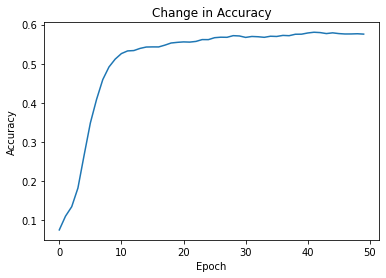

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

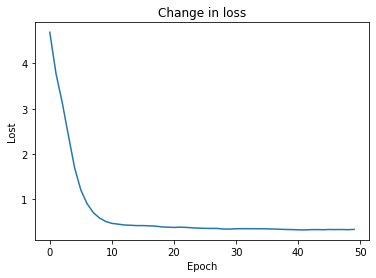

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
!cp -r "/content/model_weights_1" "/content/drive/MyDrive/Conversational Chatbot"

# Validation

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

row 1
QUESTION: something wrong with buttons
REAL ANSWER: buttons are
PREDICTED ANSWER: buttons are 

row 2
QUESTION: i am going this morning
REAL ANSWER: but stoltzfus said
PREDICTED ANSWER: but stoltzfus said 

row 3
QUESTION: but stoltzfus said
REAL ANSWER: i know what he said
PREDICTED ANSWER: i know what he said 

row 4
QUESTION: the bullets
REAL ANSWER: oh the bullets
PREDICTED ANSWER: oh bullets 

row 5
QUESTION: when will you be going
REAL ANSWER: not long a few days
PREDICTED ANSWER: not long a few days 

row 6
QUESTION: i know
REAL ANSWER: i was being foolish
PREDICTED ANSWER: finei will do the movie 

row 7
QUESTION: where is my pants
REAL ANSWER: here whenever you want them
PREDICTED ANSWER: here whenever you want them 

row 8
QUESTION: say again
REAL ANSWER: make that
PREDICTED ANSWER: you heard 

row 9
QUESTION: did you find him
REAL ANSWER: not yet
PREDICTED ANSWER: not yet 

row 10
QUESTION: everything okay
REAL ANSWER: yes thank you very much
PREDICTED ANSWER: just lik

### Bleu Score

In [ ]:
!pip install --upgrade bleu

  Created wheel for bleu: filename=bleu-0.3-cp37-none-any.whl size=5802 sha256=4521eb232518679ebc42d128d5173ab3f3a98e52469ef95d6a5092b6c1d6de87
  Stored in directory: /root/.cache/pip/wheels/a9/95/e7/cb43a1c509c38fedbee6223963e34a51a94d8991f3b3e1888e
  Created wheel for efficiency: filename=efficiency-0.5-cp37-none-any.whl size=20285 sha256=14ae7929600f65a3ba461d73c5b28ebff9224ed9b504c379c8275cfee7d670ff
  Stored in directory: /root/.cache/pip/wheels/94/fd/e6/2d34e80768fb2d001fc35b033a48114b1afdb6ea020b4cb2c7
Successfully built bleu efficiency


In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]

In [ ]:
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))

In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

30.99


## Config 2 (Over)

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 2048
rnn_size = 2048
batch_size = 128
num_layers =  3
learning_rate = 0.001
learning_rate_decay = 0.99
min_lr = 0.0001
epochs=50
DISPLAY_STEP=30

In [ ]:
save_path = '/content/model_weights_2/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.8})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.8,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)
    
    

100%|██████████| 179/179 [03:13<00:00,  1.08s/it]


Epoch 1,Average_loss 4.811149, Average Accucracy 0.084592
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 2,Average_loss 3.747305, Average Accucracy 0.118300
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 3,Average_loss 3.044442, Average Accucracy 0.144924
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 4,Average_loss 2.214761, Average Accucracy 0.212611
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <EOS> what what




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 5,Average_loss 1.510735, Average Accucracy 0.309889
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 6,Average_loss 1.066489, Average Accucracy 0.395673
  Inputs Words: ['where', 'are', 'you']
  Replied Words: now stiffgasse <EOS>




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 7,Average_loss 0.786588, Average Accucracy 0.458559
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in a ride




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 8,Average_loss 0.625151, Average Accucracy 0.499018
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 9,Average_loss 0.533894, Average Accucracy 0.526995
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 10,Average_loss 0.477578, Average Accucracy 0.542685
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 11,Average_loss 0.456388, Average Accucracy 0.550185
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 12,Average_loss 0.461688, Average Accucracy 0.548875
  Inputs Words: ['where', 'are', 'you']
  Replied Words: out front <EOS>




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 13,Average_loss 0.477220, Average Accucracy 0.542620
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 14,Average_loss 0.516712, Average Accucracy 0.531774
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in the bed




100%|██████████| 179/179 [03:11<00:00,  1.07s/it]


Epoch 15,Average_loss 0.529922, Average Accucracy 0.529024
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 16,Average_loss 0.549867, Average Accucracy 0.523277
  Inputs Words: ['where', 'are', 'you']
  Replied Words: the <UNK> <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 17,Average_loss 0.567017, Average Accucracy 0.516352
  Inputs Words: ['where', 'are', 'you']
  Replied Words: uh connecticut <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 18,Average_loss 0.547112, Average Accucracy 0.521604
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage are you




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 19,Average_loss 0.532109, Average Accucracy 0.525896
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern stiffgasse stiffgasse




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 20,Average_loss 0.523701, Average Accucracy 0.526827
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 21,Average_loss 0.507023, Average Accucracy 0.532930
  Inputs Words: ['where', 'are', 'you']
  Replied Words: jabba's branch <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 22,Average_loss 0.496726, Average Accucracy 0.538982
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <EOS> what what




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 23,Average_loss 0.492234, Average Accucracy 0.538772
  Inputs Words: ['where', 'are', 'you']
  Replied Words: jabba's kent <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 24,Average_loss 0.493407, Average Accucracy 0.538386
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern california <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 25,Average_loss 0.493898, Average Accucracy 0.539484
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 26,Average_loss 0.486219, Average Accucracy 0.540706
  Inputs Words: ['where', 'are', 'you']
  Replied Words: jabba's <UNK> <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 27,Average_loss 0.484827, Average Accucracy 0.542918
  Inputs Words: ['where', 'are', 'you']
  Replied Words: here room <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 28,Average_loss 0.486432, Average Accucracy 0.546315
  Inputs Words: ['where', 'are', 'you']
  Replied Words: jabba's <UNK> <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 29,Average_loss 0.483581, Average Accucracy 0.543834
  Inputs Words: ['where', 'are', 'you']
  Replied Words: jabba's here <EOS>




100%|██████████| 179/179 [03:13<00:00,  1.08s/it]


Epoch 30,Average_loss 0.506679, Average Accucracy 0.535942
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:13<00:00,  1.08s/it]


Epoch 31,Average_loss 0.502637, Average Accucracy 0.540175
  Inputs Words: ['where', 'are', 'you']
  Replied Words: rabbit here <EOS>




100%|██████████| 179/179 [03:13<00:00,  1.08s/it]


Epoch 32,Average_loss 0.482445, Average Accucracy 0.542809
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:12<00:00,  1.08s/it]


Epoch 33,Average_loss 0.482107, Average Accucracy 0.545958
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in my bed




100%|██████████| 179/179 [03:12<00:00,  1.08s/it]


Epoch 34,Average_loss 0.478587, Average Accucracy 0.545398
  Inputs Words: ['where', 'are', 'you']
  Replied Words: moved out <EOS>




100%|██████████| 179/179 [03:13<00:00,  1.08s/it]


Epoch 35,Average_loss 0.480348, Average Accucracy 0.545726
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:12<00:00,  1.08s/it]


Epoch 36,Average_loss 0.483550, Average Accucracy 0.543958
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in ozone <EOS>




100%|██████████| 179/179 [03:12<00:00,  1.08s/it]


Epoch 37,Average_loss 0.480629, Average Accucracy 0.543427
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern <UNK> <EOS>




100%|██████████| 179/179 [03:13<00:00,  1.08s/it]


Epoch 38,Average_loss 0.499081, Average Accucracy 0.541536
  Inputs Words: ['where', 'are', 'you']
  Replied Words: right here <EOS>




100%|██████████| 179/179 [03:12<00:00,  1.08s/it]


Epoch 39,Average_loss 0.517605, Average Accucracy 0.535869
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage you <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 40,Average_loss 0.527873, Average Accucracy 0.533520
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 41,Average_loss 0.522969, Average Accucracy 0.533170
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage was <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 42,Average_loss 0.512024, Average Accucracy 0.534974
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 43,Average_loss 0.517844, Average Accucracy 0.533854
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage amhere <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 44,Average_loss 0.519546, Average Accucracy 0.532443
  Inputs Words: ['where', 'are', 'you']
  Replied Words: right here <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 45,Average_loss 0.503611, Average Accucracy 0.538524
  Inputs Words: ['where', 'are', 'you']
  Replied Words: closer else <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 46,Average_loss 0.497781, Average Accucracy 0.538611
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 47,Average_loss 0.490759, Average Accucracy 0.539463
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.07s/it]


Epoch 48,Average_loss 0.509220, Average Accucracy 0.536153
  Inputs Words: ['where', 'are', 'you']
  Replied Words: closer amhere <EOS>




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 49,Average_loss 0.514725, Average Accucracy 0.537913
  Inputs Words: ['where', 'are', 'you']
  Replied Words: everywhere <EOS> what




100%|██████████| 179/179 [03:10<00:00,  1.06s/it]


Epoch 50,Average_loss 0.515419, Average Accucracy 0.533316
  Inputs Words: ['where', 'are', 'you']
  Replied Words: everywhere <EOS> what




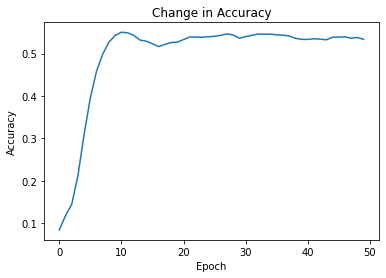

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

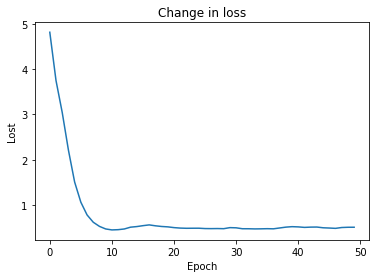

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
!cp -r "/content/model_weights_2" "/content/drive/MyDrive/Conversational Chatbot"

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

row 1
QUESTION: something wrong with buttons
REAL ANSWER: buttons are
PREDICTED ANSWER: buttons are 

row 2
QUESTION: i am going this morning
REAL ANSWER: but stoltzfus said
PREDICTED ANSWER: are you 

row 3
QUESTION: but stoltzfus said
REAL ANSWER: i know what he said
PREDICTED ANSWER: i know what he said 

row 4
QUESTION: the bullets
REAL ANSWER: oh the bullets
PREDICTED ANSWER: oh the bullets 

row 5
QUESTION: when will you be going
REAL ANSWER: not long a few days
PREDICTED ANSWER: not long a few days 

row 6
QUESTION: i know
REAL ANSWER: i was being foolish
PREDICTED ANSWER: where you gonna go 

row 7
QUESTION: where is my pants
REAL ANSWER: here whenever you want them
PREDICTED ANSWER: here whenever you want them 

row 8
QUESTION: say again
REAL ANSWER: make that
PREDICTED ANSWER: you know the key child 

row 9
QUESTION: did you find him
REAL ANSWER: not yet
PREDICTED ANSWER: not yet 

row 10
QUESTION: everything okay
REAL ANSWER: yes thank you very much
PREDICTED ANSWER: yeah da

### Bleu Score

In [ ]:
!pip install --upgrade bleu

In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]

In [ ]:
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))


In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

26.39


## Config 3(Over)

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 1024
rnn_size = 1024
batch_size = 512
num_layers =  1
learning_rate = 0.001
learning_rate_decay = 0.99
min_lr = 0.0001
#keep_prob = 0.5
epochs=80
DISPLAY_STEP=30

In [ ]:
save_path = '/content/model_weights_3/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.85})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.85,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)

100%|██████████| 44/44 [00:40<00:00,  1.09it/s]


Epoch 1,Average_loss 5.311406, Average Accucracy 0.049967
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.12it/s]


Epoch 2,Average_loss 4.376981, Average Accucracy 0.088793
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 3,Average_loss 3.956909, Average Accucracy 0.114339
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am fine




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 4,Average_loss 3.575766, Average Accucracy 0.131037
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 5,Average_loss 3.187572, Average Accucracy 0.147084
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 6,Average_loss 2.771749, Average Accucracy 0.173192
  Inputs Words: ['where', 'are', 'you']
  Replied Words: right here <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 7,Average_loss 2.352443, Average Accucracy 0.201816
  Inputs Words: ['where', 'are', 'you']
  Replied Words: right here <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 8,Average_loss 1.915246, Average Accucracy 0.250888
  Inputs Words: ['where', 'are', 'you']
  Replied Words: right here <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 9,Average_loss 1.505873, Average Accucracy 0.310547
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage <UNK> <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 10,Average_loss 1.172080, Average Accucracy 0.375599
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 11,Average_loss 0.902820, Average Accucracy 0.436006
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage here <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 12,Average_loss 0.668450, Average Accucracy 0.497596
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in a <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 13,Average_loss 0.496385, Average Accucracy 0.547060
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage here <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.09it/s]


Epoch 14,Average_loss 0.385837, Average Accucracy 0.578754
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 15,Average_loss 0.315462, Average Accucracy 0.598714
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 16,Average_loss 0.272534, Average Accucracy 0.607363
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 17,Average_loss 0.243723, Average Accucracy 0.615767
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 18,Average_loss 0.224052, Average Accucracy 0.621242
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 19,Average_loss 0.209980, Average Accucracy 0.623372
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 20,Average_loss 0.197372, Average Accucracy 0.626635
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 21,Average_loss 0.189890, Average Accucracy 0.626354
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 22,Average_loss 0.184877, Average Accucracy 0.629025
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 23,Average_loss 0.179540, Average Accucracy 0.630282
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 24,Average_loss 0.173643, Average Accucracy 0.630600
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 25,Average_loss 0.170513, Average Accucracy 0.631940
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 26,Average_loss 0.166026, Average Accucracy 0.631503
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 27,Average_loss 0.165617, Average Accucracy 0.630578
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 28,Average_loss 0.163353, Average Accucracy 0.632702
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 29,Average_loss 0.163675, Average Accucracy 0.631688
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 30,Average_loss 0.159920, Average Accucracy 0.631747
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 31,Average_loss 0.160219, Average Accucracy 0.632827
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 32,Average_loss 0.158284, Average Accucracy 0.634115
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 33,Average_loss 0.157424, Average Accucracy 0.633404
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 34,Average_loss 0.154018, Average Accucracy 0.633153
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 35,Average_loss 0.154298, Average Accucracy 0.633175
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 36,Average_loss 0.153400, Average Accucracy 0.633974
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 37,Average_loss 0.152901, Average Accucracy 0.633589
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 38,Average_loss 0.151059, Average Accucracy 0.633064
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 39,Average_loss 0.150972, Average Accucracy 0.634218
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 40,Average_loss 0.150086, Average Accucracy 0.634070
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.09it/s]


Epoch 41,Average_loss 0.151446, Average Accucracy 0.634455
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 42,Average_loss 0.150001, Average Accucracy 0.634314
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 43,Average_loss 0.151164, Average Accucracy 0.634411
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 44,Average_loss 0.154592, Average Accucracy 0.633449
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 45,Average_loss 0.161543, Average Accucracy 0.632672
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 46,Average_loss 0.169253, Average Accucracy 0.632235
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 47,Average_loss 0.182178, Average Accucracy 0.630467
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 48,Average_loss 0.203501, Average Accucracy 0.625666
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 49,Average_loss 0.232457, Average Accucracy 0.619044
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 50,Average_loss 0.259025, Average Accucracy 0.612297
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 51,Average_loss 0.274689, Average Accucracy 0.607792
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 52,Average_loss 0.277308, Average Accucracy 0.605210
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 53,Average_loss 0.272428, Average Accucracy 0.607074
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 54,Average_loss 0.244075, Average Accucracy 0.613962
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 55,Average_loss 0.214552, Average Accucracy 0.621804
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 56,Average_loss 0.190642, Average Accucracy 0.627345
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 57,Average_loss 0.175364, Average Accucracy 0.630578
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 58,Average_loss 0.161309, Average Accucracy 0.633205
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 59,Average_loss 0.153593, Average Accucracy 0.633671
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 60,Average_loss 0.149149, Average Accucracy 0.635409
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.11it/s]


Epoch 61,Average_loss 0.145828, Average Accucracy 0.636238
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 62,Average_loss 0.142493, Average Accucracy 0.637436
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 63,Average_loss 0.140458, Average Accucracy 0.637370
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 64,Average_loss 0.138693, Average Accucracy 0.637052
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 65,Average_loss 0.137015, Average Accucracy 0.638701
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 66,Average_loss 0.135477, Average Accucracy 0.637651
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 67,Average_loss 0.133766, Average Accucracy 0.637503
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 68,Average_loss 0.133592, Average Accucracy 0.638886
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 69,Average_loss 0.133084, Average Accucracy 0.638102
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.09it/s]


Epoch 70,Average_loss 0.132213, Average Accucracy 0.639648
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 71,Average_loss 0.131513, Average Accucracy 0.638531
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 72,Average_loss 0.131423, Average Accucracy 0.639449
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 73,Average_loss 0.130949, Average Accucracy 0.638857
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 74,Average_loss 0.129532, Average Accucracy 0.640847
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 75,Average_loss 0.131452, Average Accucracy 0.639197
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 76,Average_loss 0.129751, Average Accucracy 0.639131
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 77,Average_loss 0.128285, Average Accucracy 0.639811
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.10it/s]


Epoch 78,Average_loss 0.127858, Average Accucracy 0.639774
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:39<00:00,  1.10it/s]


Epoch 79,Average_loss 0.129448, Average Accucracy 0.640447
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:40<00:00,  1.09it/s]


Epoch 80,Average_loss 0.129046, Average Accucracy 0.641195
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




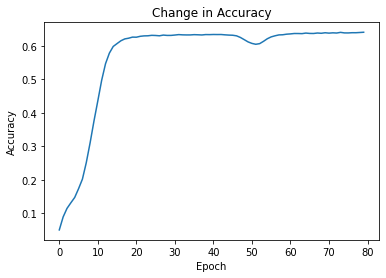

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

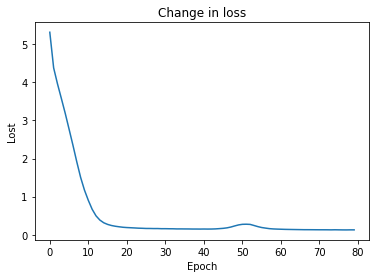

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
!cp -r "/content/model_weights_3" "/content/drive/MyDrive/Conversational Chatbot"

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

row 1
QUESTION: where did you get that
REAL ANSWER: at the on
PREDICTED ANSWER: is not a that 

row 2
QUESTION: did she believe you
REAL ANSWER: i have no idea
PREDICTED ANSWER: i have no idea 

row 3
QUESTION: where is boyd
REAL ANSWER: downstairs in the closet
PREDICTED ANSWER: downstairs in the closet 

row 4
QUESTION: what song
REAL ANSWER: you send me
PREDICTED ANSWER: you send me 

row 5
QUESTION: the stone age
REAL ANSWER: the postvegas man
PREDICTED ANSWER: the postvegas man 

row 6
QUESTION: the postvegas man
REAL ANSWER: a mutant species
PREDICTED ANSWER: a mutant species 

row 7
QUESTION: a mutant species
REAL ANSWER: okay boys smile
PREDICTED ANSWER: okay boys smile 

row 8
QUESTION: good times
REAL ANSWER: real times
PREDICTED ANSWER: real times 

row 9
QUESTION: she is dead
REAL ANSWER: it was an accident
PREDICTED ANSWER: she is dead 

row 10
QUESTION: shut up micheal
REAL ANSWER: i killed my brother
PREDICTED ANSWER: i killed my brother 

row 11
QUESTION: don
REAL ANSWE

### Bleu Score

In [ ]:
!pip install --upgrade bleu

  Created wheel for bleu: filename=bleu-0.3-cp37-none-any.whl size=5802 sha256=046f0bf063cd5528b3d0c8ade18b5f8c3a0cb7efc0ddbff1657b130779016a95
  Stored in directory: /root/.cache/pip/wheels/a9/95/e7/cb43a1c509c38fedbee6223963e34a51a94d8991f3b3e1888e
  Created wheel for efficiency: filename=efficiency-0.5-cp37-none-any.whl size=20285 sha256=40228820c8dcd8d2f80cc69879d189be9d724fe2798313101588de6a1cad8aad
  Stored in directory: /root/.cache/pip/wheels/94/fd/e6/2d34e80768fb2d001fc35b033a48114b1afdb6ea020b4cb2c7
Successfully built bleu efficiency


In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]

In [ ]:
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))

In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

36.13


### Config 4

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 2048
rnn_size = 1024
batch_size = 512
num_layers =  1
learning_rate = 0.001
learning_rate_decay = 0.99
min_lr = 0.0001
#keep_prob = 0.5
epochs=80
DISPLAY_STEP=30

In [ ]:
save_path = '/content/model_weights_4/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.90})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.90,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)

100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 1,Average_loss 5.263757, Average Accucracy 0.057122
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am not




100%|██████████| 44/44 [00:47<00:00,  1.08s/it]


Epoch 2,Average_loss 4.272362, Average Accucracy 0.082246
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 3,Average_loss 3.817041, Average Accucracy 0.092685
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 4,Average_loss 3.300900, Average Accucracy 0.114110
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 5,Average_loss 2.726949, Average Accucracy 0.146847
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 6,Average_loss 2.135661, Average Accucracy 0.203976
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 7,Average_loss 1.593615, Average Accucracy 0.284032
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 8,Average_loss 1.150610, Average Accucracy 0.367802
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 9,Average_loss 0.826265, Average Accucracy 0.444033
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in the bed




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 10,Average_loss 0.616776, Average Accucracy 0.504424
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 11,Average_loss 0.462483, Average Accucracy 0.545514
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in my bed




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 12,Average_loss 0.370658, Average Accucracy 0.571282
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 13,Average_loss 0.306596, Average Accucracy 0.587365
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 14,Average_loss 0.271493, Average Accucracy 0.596635
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 15,Average_loss 0.245258, Average Accucracy 0.602435
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:49<00:00,  1.12s/it]


Epoch 16,Average_loss 0.231836, Average Accucracy 0.604507
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 17,Average_loss 0.220709, Average Accucracy 0.606593
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 18,Average_loss 0.212929, Average Accucracy 0.609086
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am everywhere




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 19,Average_loss 0.205133, Average Accucracy 0.609634
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am everywhere




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 20,Average_loss 0.200498, Average Accucracy 0.611506
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am everywhere




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 21,Average_loss 0.194862, Average Accucracy 0.611691
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 22,Average_loss 0.191027, Average Accucracy 0.614398
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 23,Average_loss 0.187148, Average Accucracy 0.614657
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 24,Average_loss 0.183932, Average Accucracy 0.616278
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 25,Average_loss 0.180519, Average Accucracy 0.616233
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 26,Average_loss 0.177908, Average Accucracy 0.618171
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 27,Average_loss 0.174066, Average Accucracy 0.618837
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 28,Average_loss 0.171935, Average Accucracy 0.620398
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:49<00:00,  1.11s/it]


Epoch 29,Average_loss 0.169329, Average Accucracy 0.620842
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 30,Average_loss 0.167126, Average Accucracy 0.621826
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 31,Average_loss 0.164204, Average Accucracy 0.623136
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 32,Average_loss 0.161926, Average Accucracy 0.622322
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 33,Average_loss 0.161428, Average Accucracy 0.623446
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 34,Average_loss 0.159358, Average Accucracy 0.624001
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 35,Average_loss 0.156311, Average Accucracy 0.625621
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:49<00:00,  1.11s/it]


Epoch 36,Average_loss 0.156163, Average Accucracy 0.625422
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 37,Average_loss 0.154885, Average Accucracy 0.626746
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> control <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 38,Average_loss 0.154875, Average Accucracy 0.626199
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 39,Average_loss 0.154101, Average Accucracy 0.626450
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 40,Average_loss 0.153990, Average Accucracy 0.628085
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 41,Average_loss 0.159011, Average Accucracy 0.626147
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 42,Average_loss 0.167132, Average Accucracy 0.625777
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:49<00:00,  1.12s/it]


Epoch 43,Average_loss 0.180392, Average Accucracy 0.623491
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 44,Average_loss 0.220451, Average Accucracy 0.617631
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 45,Average_loss 0.302263, Average Accucracy 0.598818
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 46,Average_loss 0.393962, Average Accucracy 0.568855
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 47,Average_loss 0.416021, Average Accucracy 0.554229
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 48,Average_loss 0.353205, Average Accucracy 0.570401
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> control <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 49,Average_loss 0.282147, Average Accucracy 0.594238
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 50,Average_loss 0.225424, Average Accucracy 0.612172
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 51,Average_loss 0.191622, Average Accucracy 0.621345
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 52,Average_loss 0.171333, Average Accucracy 0.626339
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> control <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 53,Average_loss 0.161187, Average Accucracy 0.628596
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> am not




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 54,Average_loss 0.152910, Average Accucracy 0.631325
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 55,Average_loss 0.148854, Average Accucracy 0.630985
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in my bed




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 56,Average_loss 0.146667, Average Accucracy 0.632635
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 57,Average_loss 0.142174, Average Accucracy 0.632058
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 58,Average_loss 0.141430, Average Accucracy 0.633153
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 59,Average_loss 0.137661, Average Accucracy 0.634004
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 60,Average_loss 0.136729, Average Accucracy 0.634403
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 61,Average_loss 0.135974, Average Accucracy 0.634965
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 62,Average_loss 0.134835, Average Accucracy 0.635210
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 63,Average_loss 0.133516, Average Accucracy 0.635520
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 64,Average_loss 0.133120, Average Accucracy 0.636053
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 65,Average_loss 0.132514, Average Accucracy 0.636534
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 66,Average_loss 0.131796, Average Accucracy 0.636386
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 67,Average_loss 0.130189, Average Accucracy 0.636660
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 68,Average_loss 0.131836, Average Accucracy 0.637066
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 69,Average_loss 0.130039, Average Accucracy 0.637791
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 70,Average_loss 0.129282, Average Accucracy 0.637037
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 71,Average_loss 0.128573, Average Accucracy 0.637799
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 72,Average_loss 0.129127, Average Accucracy 0.637895
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 73,Average_loss 0.128934, Average Accucracy 0.637540
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 74,Average_loss 0.127073, Average Accucracy 0.639375
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 75,Average_loss 0.127902, Average Accucracy 0.637355
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.10s/it]


Epoch 76,Average_loss 0.127407, Average Accucracy 0.638494
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 77,Average_loss 0.126661, Average Accucracy 0.638487
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 78,Average_loss 0.127768, Average Accucracy 0.637814
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 79,Average_loss 0.127036, Average Accucracy 0.638546
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:48<00:00,  1.11s/it]


Epoch 80,Average_loss 0.126151, Average Accucracy 0.639367
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




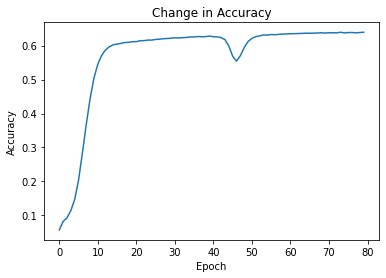

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

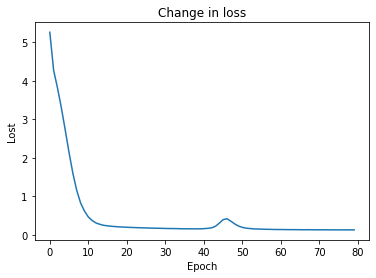

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
!cp -r "/content/model_weights_4" "/content/drive/MyDrive/Conversational Chatbot"

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

row 1
QUESTION: where did you get that
REAL ANSWER: at the on
PREDICTED ANSWER: at the on 

row 2
QUESTION: did she believe you
REAL ANSWER: i have no idea
PREDICTED ANSWER: i have no idea 

row 3
QUESTION: where is boyd
REAL ANSWER: downstairs in the closet
PREDICTED ANSWER: downstairs in the closet 

row 4
QUESTION: what song
REAL ANSWER: you send me
PREDICTED ANSWER: you send me 

row 5
QUESTION: the stone age
REAL ANSWER: the postvegas man
PREDICTED ANSWER: the postvegas man 

row 6
QUESTION: the postvegas man
REAL ANSWER: a mutant species
PREDICTED ANSWER: a mutant species 

row 7
QUESTION: a mutant species
REAL ANSWER: okay boys smile
PREDICTED ANSWER: okay boys smile 

row 8
QUESTION: good times
REAL ANSWER: real times
PREDICTED ANSWER: real times 

row 9
QUESTION: she is dead
REAL ANSWER: it was an accident
PREDICTED ANSWER: yes she is 

row 10
QUESTION: shut up micheal
REAL ANSWER: i killed my brother
PREDICTED ANSWER: i killed my brother 

row 11
QUESTION: don
REAL ANSWER: th

### Bleu Score

In [ ]:
!pip install --upgrade bleu

Requirement already up-to-date: bleu in /usr/local/lib/python3.7/dist-packages (0.3)


In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]

In [ ]:
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))

In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

36.52


### Config 5(Over)

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 128
rnn_size = 128
batch_size = 128
num_layers = 2 
learning_rate = 0.001
learning_rate_decay = 0.9
min_lr = 0.0001
#keep_prob = 0.5
epochs=50
DISPLAY_STEP=30

In [ ]:
save_path = '/content/model_weights_5/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.8})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.8,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)

100%|██████████| 179/179 [00:13<00:00, 13.39it/s]


Epoch 1,Average_loss 5.383245, Average Accucracy 0.044133
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i you <EOS>




100%|██████████| 179/179 [00:13<00:00, 13.62it/s]


Epoch 2,Average_loss 4.622807, Average Accucracy 0.098856
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 179/179 [00:13<00:00, 13.50it/s]


Epoch 3,Average_loss 4.358004, Average Accucracy 0.126418
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 179/179 [00:13<00:00, 13.27it/s]


Epoch 4,Average_loss 4.192328, Average Accucracy 0.138945
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 13.13it/s]


Epoch 5,Average_loss 4.063702, Average Accucracy 0.146837
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.98it/s]


Epoch 6,Average_loss 3.948889, Average Accucracy 0.151885
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:14<00:00, 12.74it/s]


Epoch 7,Average_loss 3.851452, Average Accucracy 0.156003
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 179/179 [00:14<00:00, 12.75it/s]


Epoch 8,Average_loss 3.766292, Average Accucracy 0.156723
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:14<00:00, 12.65it/s]


Epoch 9,Average_loss 3.680803, Average Accucracy 0.160564
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:14<00:00, 12.76it/s]


Epoch 10,Average_loss 3.592824, Average Accucracy 0.163611
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.84it/s]


Epoch 11,Average_loss 3.512503, Average Accucracy 0.164935
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.80it/s]


Epoch 12,Average_loss 3.435018, Average Accucracy 0.165605
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.88it/s]


Epoch 13,Average_loss 3.347976, Average Accucracy 0.169147
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.82it/s]


Epoch 14,Average_loss 3.262307, Average Accucracy 0.171744
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.88it/s]


Epoch 15,Average_loss 3.178874, Average Accucracy 0.174959
  Inputs Words: ['where', 'are', 'you']
  Replied Words: to bed <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.86it/s]


Epoch 16,Average_loss 3.089675, Average Accucracy 0.178669
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.92it/s]


Epoch 17,Average_loss 3.007763, Average Accucracy 0.181739
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.87it/s]


Epoch 18,Average_loss 2.926656, Average Accucracy 0.185376
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.86it/s]


Epoch 19,Average_loss 2.848083, Average Accucracy 0.189762
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.82it/s]


Epoch 20,Average_loss 2.784260, Average Accucracy 0.191217
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.82it/s]


Epoch 21,Average_loss 2.703654, Average Accucracy 0.195880
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.85it/s]


Epoch 22,Average_loss 2.630480, Average Accucracy 0.201197
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.85it/s]


Epoch 23,Average_loss 2.560356, Average Accucracy 0.206398
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.82it/s]


Epoch 24,Average_loss 2.490703, Average Accucracy 0.210632
  Inputs Words: ['where', 'are', 'you']
  Replied Words: out sir <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.98it/s]


Epoch 25,Average_loss 2.426681, Average Accucracy 0.215760
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i know <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.95it/s]


Epoch 26,Average_loss 2.362756, Average Accucracy 0.221587
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.97it/s]


Epoch 27,Average_loss 2.298646, Average Accucracy 0.227341
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.91it/s]


Epoch 28,Average_loss 2.235410, Average Accucracy 0.232135
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.94it/s]


Epoch 29,Average_loss 2.175892, Average Accucracy 0.238019
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.89it/s]


Epoch 30,Average_loss 2.118725, Average Accucracy 0.241889
  Inputs Words: ['where', 'are', 'you']
  Replied Words: out of warsaw




100%|██████████| 179/179 [00:13<00:00, 12.91it/s]


Epoch 31,Average_loss 2.065068, Average Accucracy 0.246945
  Inputs Words: ['where', 'are', 'you']
  Replied Words: out sir <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.89it/s]


Epoch 32,Average_loss 2.012774, Average Accucracy 0.251178
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i palace <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.93it/s]


Epoch 33,Average_loss 1.958178, Average Accucracy 0.258671
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.90it/s]


Epoch 34,Average_loss 1.912002, Average Accucracy 0.263690
  Inputs Words: ['where', 'are', 'you']
  Replied Words: just soda <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.92it/s]


Epoch 35,Average_loss 1.865116, Average Accucracy 0.269415
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.89it/s]


Epoch 36,Average_loss 1.820183, Average Accucracy 0.273008
  Inputs Words: ['where', 'are', 'you']
  Replied Words: out here <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.91it/s]


Epoch 37,Average_loss 1.782909, Average Accucracy 0.276311
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in bed <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.90it/s]


Epoch 38,Average_loss 1.750579, Average Accucracy 0.281272
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.86it/s]


Epoch 39,Average_loss 1.703058, Average Accucracy 0.286844
  Inputs Words: ['where', 'are', 'you']
  Replied Words: just bed <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.92it/s]


Epoch 40,Average_loss 1.650395, Average Accucracy 0.293994
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> amall <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.93it/s]


Epoch 41,Average_loss 1.613744, Average Accucracy 0.298905
  Inputs Words: ['where', 'are', 'you']
  Replied Words: just bed <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.97it/s]


Epoch 42,Average_loss 1.569759, Average Accucracy 0.303225
  Inputs Words: ['where', 'are', 'you']
  Replied Words: excuse me <EOS>




100%|██████████| 179/179 [00:13<00:00, 13.01it/s]


Epoch 43,Average_loss 1.524819, Average Accucracy 0.310063
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.95it/s]


Epoch 44,Average_loss 1.492415, Average Accucracy 0.313744
  Inputs Words: ['where', 'are', 'you']
  Replied Words: southern <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.97it/s]


Epoch 45,Average_loss 1.453846, Average Accucracy 0.319927
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [00:13<00:00, 13.09it/s]


Epoch 46,Average_loss 1.417564, Average Accucracy 0.326256
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.98it/s]


Epoch 47,Average_loss 1.383658, Average Accucracy 0.329980
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.91it/s]


Epoch 48,Average_loss 1.354527, Average Accucracy 0.333995
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.99it/s]


Epoch 49,Average_loss 1.318482, Average Accucracy 0.342586
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 179/179 [00:13<00:00, 12.90it/s]


Epoch 50,Average_loss 1.289145, Average Accucracy 0.344259
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




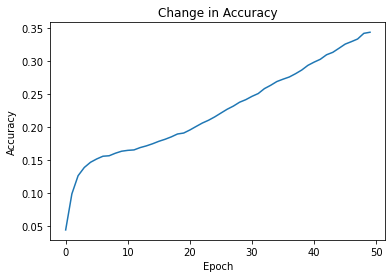

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

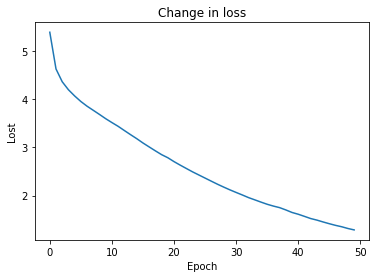

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

row 1
QUESTION: something wrong with buttons
REAL ANSWER: buttons are
PREDICTED ANSWER: buttons are 

row 2
QUESTION: i am going this morning
REAL ANSWER: but stoltzfus said
PREDICTED ANSWER: but stoltzfus said 

row 3
QUESTION: but stoltzfus said
REAL ANSWER: i know what he said
PREDICTED ANSWER: i know what he said 

row 4
QUESTION: the bullets
REAL ANSWER: oh the bullets
PREDICTED ANSWER: oh the bullets 

row 5
QUESTION: when will you be going
REAL ANSWER: not long a few days
PREDICTED ANSWER: just will you my blood 

row 6
QUESTION: i know
REAL ANSWER: i was being foolish
PREDICTED ANSWER: i do not know 

row 7
QUESTION: where is my pants
REAL ANSWER: here whenever you want them
PREDICTED ANSWER: here whenever you think 

row 8
QUESTION: say again
REAL ANSWER: make that
PREDICTED ANSWER: you know 

row 9
QUESTION: did you find him
REAL ANSWER: not yet
PREDICTED ANSWER: no no 

row 10
QUESTION: everything okay
REAL ANSWER: yes thank you very much
PREDICTED ANSWER: yes i am doctor 



In [ ]:
!cp -r "/content/model_weights_5" "/content/drive/MyDrive/Conversational Chatbot"

### Bleu Score

In [ ]:
!pip install --upgrade bleu

Requirement already up-to-date: bleu in /usr/local/lib/python3.7/dist-packages (0.3)


In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]

In [ ]:
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))

In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

11.98


### Config 6(Over)

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 512
rnn_size = 512
batch_size = 512
num_layers =  3
learning_rate = 0.001
learning_rate_decay = 0.99
min_lr = 0.0001
#keep_prob = 0.5
epochs=80
DISPLAY_STEP=30

In [ ]:
save_path = '/content/model_weights_6/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.75})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.75,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)

100%|██████████| 44/44 [00:16<00:00,  2.71it/s]


Epoch 1,Average_loss 5.547088, Average Accucracy 0.031553
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:14<00:00,  3.09it/s]


Epoch 2,Average_loss 4.646650, Average Accucracy 0.075617
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:14<00:00,  2.98it/s]


Epoch 3,Average_loss 4.358364, Average Accucracy 0.107770
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:14<00:00,  2.94it/s]


Epoch 4,Average_loss 4.079211, Average Accucracy 0.127752
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 5,Average_loss 3.856942, Average Accucracy 0.137259
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 6,Average_loss 3.655118, Average Accucracy 0.149007
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 7,Average_loss 3.475782, Average Accucracy 0.153631
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 8,Average_loss 3.281570, Average Accucracy 0.161725
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 9,Average_loss 3.069021, Average Accucracy 0.171231
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 10,Average_loss 2.861399, Average Accucracy 0.178607
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 11,Average_loss 2.652424, Average Accucracy 0.190592
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 12,Average_loss 2.459242, Average Accucracy 0.205182
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 13,Average_loss 2.242246, Average Accucracy 0.227162
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 14,Average_loss 2.038463, Average Accucracy 0.248010
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> holiness <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 15,Average_loss 1.866648, Average Accucracy 0.265484
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 16,Average_loss 1.704022, Average Accucracy 0.287442
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 17,Average_loss 1.522428, Average Accucracy 0.316517
  Inputs Words: ['where', 'are', 'you']
  Replied Words: here here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 18,Average_loss 1.376095, Average Accucracy 0.336196
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 19,Average_loss 1.239452, Average Accucracy 0.359331
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 20,Average_loss 1.096178, Average Accucracy 0.389212
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 21,Average_loss 0.968614, Average Accucracy 0.419300
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 22,Average_loss 0.870737, Average Accucracy 0.442679
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 23,Average_loss 0.763920, Average Accucracy 0.471990
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> holiness <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 24,Average_loss 0.678805, Average Accucracy 0.492032
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 25,Average_loss 0.603703, Average Accucracy 0.513894
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> watch <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 26,Average_loss 0.532032, Average Accucracy 0.532878
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 27,Average_loss 0.481535, Average Accucracy 0.549568
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 28,Average_loss 0.435460, Average Accucracy 0.564668
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 29,Average_loss 0.390473, Average Accucracy 0.576616
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 30,Average_loss 0.357409, Average Accucracy 0.587543
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 31,Average_loss 0.329904, Average Accucracy 0.596295
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 32,Average_loss 0.305739, Average Accucracy 0.604063
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 33,Average_loss 0.286195, Average Accucracy 0.609885
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 34,Average_loss 0.268174, Average Accucracy 0.615153
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> hanging <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 35,Average_loss 0.257127, Average Accucracy 0.616218
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 36,Average_loss 0.248404, Average Accucracy 0.616884
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> everywhere <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 37,Average_loss 0.239508, Average Accucracy 0.620724
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 38,Average_loss 0.231984, Average Accucracy 0.621908
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 39,Average_loss 0.224265, Average Accucracy 0.624682
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> everywhere <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 40,Average_loss 0.216379, Average Accucracy 0.627634
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 41,Average_loss 0.211892, Average Accucracy 0.628300
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 42,Average_loss 0.206487, Average Accucracy 0.629136
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 43,Average_loss 0.200608, Average Accucracy 0.630097
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 44,Average_loss 0.198961, Average Accucracy 0.632768
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 45,Average_loss 0.193575, Average Accucracy 0.632694
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 46,Average_loss 0.192054, Average Accucracy 0.632746
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 47,Average_loss 0.188096, Average Accucracy 0.633375
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 48,Average_loss 0.185744, Average Accucracy 0.633345
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 49,Average_loss 0.186392, Average Accucracy 0.633767
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 50,Average_loss 0.182961, Average Accucracy 0.633464
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.90it/s]


Epoch 51,Average_loss 0.182966, Average Accucracy 0.632931
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 52,Average_loss 0.181345, Average Accucracy 0.634070
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 53,Average_loss 0.179149, Average Accucracy 0.634344
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 54,Average_loss 0.176972, Average Accucracy 0.634677
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 55,Average_loss 0.175063, Average Accucracy 0.635557
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 56,Average_loss 0.176342, Average Accucracy 0.635121
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 57,Average_loss 0.172524, Average Accucracy 0.636282
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 58,Average_loss 0.171682, Average Accucracy 0.635202
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 59,Average_loss 0.169737, Average Accucracy 0.636164
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 60,Average_loss 0.169939, Average Accucracy 0.635313
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 61,Average_loss 0.168096, Average Accucracy 0.636778
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 62,Average_loss 0.167059, Average Accucracy 0.637769
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 63,Average_loss 0.168325, Average Accucracy 0.636660
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 64,Average_loss 0.167075, Average Accucracy 0.636697
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 65,Average_loss 0.167487, Average Accucracy 0.636504
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 66,Average_loss 0.167074, Average Accucracy 0.636815
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 67,Average_loss 0.164848, Average Accucracy 0.636830
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 68,Average_loss 0.161552, Average Accucracy 0.637873
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 69,Average_loss 0.163642, Average Accucracy 0.637385
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.86it/s]


Epoch 70,Average_loss 0.164700, Average Accucracy 0.637355
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 71,Average_loss 0.164824, Average Accucracy 0.636600
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 72,Average_loss 0.162416, Average Accucracy 0.637599
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 73,Average_loss 0.162563, Average Accucracy 0.638317
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.93it/s]


Epoch 74,Average_loss 0.162492, Average Accucracy 0.637984
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 75,Average_loss 0.161036, Average Accucracy 0.638280
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 76,Average_loss 0.161108, Average Accucracy 0.639301
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 77,Average_loss 0.159114, Average Accucracy 0.636652
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 78,Average_loss 0.160590, Average Accucracy 0.637999
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 79,Average_loss 0.159454, Average Accucracy 0.637385
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.92it/s]


Epoch 80,Average_loss 0.157836, Average Accucracy 0.637762
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




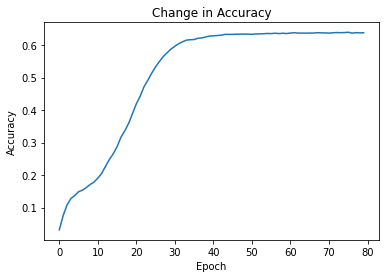

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

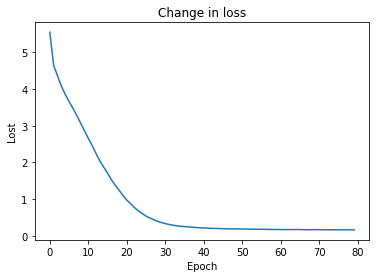

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

row 1
QUESTION: where did you get that
REAL ANSWER: at the on
PREDICTED ANSWER: is not a that 

row 2
QUESTION: did she believe you
REAL ANSWER: i have no idea
PREDICTED ANSWER: i have no idea 

row 3
QUESTION: where is boyd
REAL ANSWER: downstairs in the closet
PREDICTED ANSWER: downstairs in the closet 

row 4
QUESTION: what song
REAL ANSWER: you send me
PREDICTED ANSWER: you send me 

row 5
QUESTION: the stone age
REAL ANSWER: the postvegas man
PREDICTED ANSWER: the postvegas man 

row 6
QUESTION: the postvegas man
REAL ANSWER: a mutant species
PREDICTED ANSWER: a mutant species 

row 7
QUESTION: a mutant species
REAL ANSWER: okay boys smile
PREDICTED ANSWER: okay boys smile 

row 8
QUESTION: good times
REAL ANSWER: real times
PREDICTED ANSWER: real times 

row 9
QUESTION: she is dead
REAL ANSWER: it was an accident
PREDICTED ANSWER: she is dead 

row 10
QUESTION: shut up micheal
REAL ANSWER: i killed my brother
PREDICTED ANSWER: i killed my brother 

row 11
QUESTION: don
REAL ANSWE

In [ ]:
!cp -r "/content/model_weights_6" "/content/drive/MyDrive/Conversational Chatbot"

### Bleu Score

In [ ]:
!pip install --upgrade bleu

  Created wheel for bleu: filename=bleu-0.3-cp37-none-any.whl size=5802 sha256=eb00fbe86c46ed351096e08f034ead9abf0ac65f1e97832c6e797073275b6485
  Stored in directory: /root/.cache/pip/wheels/a9/95/e7/cb43a1c509c38fedbee6223963e34a51a94d8991f3b3e1888e
  Created wheel for efficiency: filename=efficiency-0.5-cp37-none-any.whl size=20285 sha256=f40390ef3c0b6e68e49b169f08a64fb517536f22664ea739bc71287cd7201ad7
  Stored in directory: /root/.cache/pip/wheels/94/fd/e6/2d34e80768fb2d001fc35b033a48114b1afdb6ea020b4cb2c7
Successfully built bleu efficiency


In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]

In [ ]:
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))

In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

34.77


### Config 7(Over)

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 512
rnn_size = 512
batch_size = 512
num_layers =  1
learning_rate = 0.001
learning_rate_decay = 0.99
min_lr = 0.0001
#keep_prob = 0.85
epochs=80
DISPLAY_STEP=30

In [ ]:
save_path = '/content/model_weights_7/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.85})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.85,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)

100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 1,Average_loss 5.526241, Average Accucracy 0.034816
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:14<00:00,  3.06it/s]


Epoch 2,Average_loss 4.640857, Average Accucracy 0.078073
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:14<00:00,  2.94it/s]


Epoch 3,Average_loss 4.313668, Average Accucracy 0.112815
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.91it/s]


Epoch 4,Average_loss 4.052703, Average Accucracy 0.128359
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 5,Average_loss 3.826295, Average Accucracy 0.140551
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 6,Average_loss 3.619112, Average Accucracy 0.154378
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 7,Average_loss 3.439004, Average Accucracy 0.156657
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.90it/s]


Epoch 8,Average_loss 3.242219, Average Accucracy 0.162376
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 9,Average_loss 3.016314, Average Accucracy 0.174413
  Inputs Words: ['where', 'are', 'you']
  Replied Words: nowherei amhere <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 10,Average_loss 2.797054, Average Accucracy 0.184807
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> holiness <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 11,Average_loss 2.586643, Average Accucracy 0.197421
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 12,Average_loss 2.379512, Average Accucracy 0.216050
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.90it/s]


Epoch 13,Average_loss 2.177286, Average Accucracy 0.235315
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> bed <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 14,Average_loss 1.949485, Average Accucracy 0.259448
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 15,Average_loss 1.727049, Average Accucracy 0.286895
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 16,Average_loss 1.522051, Average Accucracy 0.322732
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 17,Average_loss 1.345155, Average Accucracy 0.349247
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage out <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 18,Average_loss 1.179852, Average Accucracy 0.379935
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage to <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 19,Average_loss 1.043166, Average Accucracy 0.411947
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 20,Average_loss 0.919926, Average Accucracy 0.437396
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 21,Average_loss 0.807501, Average Accucracy 0.462402
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 22,Average_loss 0.701790, Average Accucracy 0.492003
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage <EOS> what




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 23,Average_loss 0.609949, Average Accucracy 0.515973
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 24,Average_loss 0.530783, Average Accucracy 0.537805
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 25,Average_loss 0.458889, Average Accucracy 0.561191
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 26,Average_loss 0.406683, Average Accucracy 0.575861
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 27,Average_loss 0.369767, Average Accucracy 0.586899
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 28,Average_loss 0.336466, Average Accucracy 0.597124
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 29,Average_loss 0.303598, Average Accucracy 0.606741
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 30,Average_loss 0.278490, Average Accucracy 0.613422
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 31,Average_loss 0.260398, Average Accucracy 0.619289
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 32,Average_loss 0.241663, Average Accucracy 0.623528
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 33,Average_loss 0.231467, Average Accucracy 0.626065
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 34,Average_loss 0.224114, Average Accucracy 0.626391
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 35,Average_loss 0.213391, Average Accucracy 0.628351
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 36,Average_loss 0.208127, Average Accucracy 0.630120
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 37,Average_loss 0.200911, Average Accucracy 0.631466
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 38,Average_loss 0.193746, Average Accucracy 0.632916
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> everywhere <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 39,Average_loss 0.189888, Average Accucracy 0.634433
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 40,Average_loss 0.185675, Average Accucracy 0.634063
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 41,Average_loss 0.184349, Average Accucracy 0.635165
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 42,Average_loss 0.180277, Average Accucracy 0.634810
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 43,Average_loss 0.177378, Average Accucracy 0.634877
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.83it/s]


Epoch 44,Average_loss 0.174075, Average Accucracy 0.635809
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 45,Average_loss 0.173219, Average Accucracy 0.636771
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 46,Average_loss 0.172596, Average Accucracy 0.636475
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 47,Average_loss 0.169796, Average Accucracy 0.637200
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 48,Average_loss 0.168257, Average Accucracy 0.637422
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 49,Average_loss 0.166804, Average Accucracy 0.637584
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 50,Average_loss 0.165112, Average Accucracy 0.636778
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 51,Average_loss 0.165075, Average Accucracy 0.636615
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 52,Average_loss 0.161809, Average Accucracy 0.637177
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 53,Average_loss 0.164155, Average Accucracy 0.637059
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 54,Average_loss 0.160917, Average Accucracy 0.638509
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 55,Average_loss 0.158502, Average Accucracy 0.638161
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 56,Average_loss 0.160191, Average Accucracy 0.637562
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 57,Average_loss 0.159693, Average Accucracy 0.637932
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 58,Average_loss 0.157879, Average Accucracy 0.638472
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 59,Average_loss 0.157342, Average Accucracy 0.637954
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 60,Average_loss 0.158328, Average Accucracy 0.638968
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 61,Average_loss 0.157759, Average Accucracy 0.638117
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 62,Average_loss 0.158535, Average Accucracy 0.638235
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 63,Average_loss 0.159025, Average Accucracy 0.638931
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 64,Average_loss 0.157431, Average Accucracy 0.637214
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 65,Average_loss 0.158417, Average Accucracy 0.637925
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 66,Average_loss 0.157384, Average Accucracy 0.638923
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 67,Average_loss 0.154373, Average Accucracy 0.638435
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.89it/s]


Epoch 68,Average_loss 0.155318, Average Accucracy 0.639182
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 69,Average_loss 0.157058, Average Accucracy 0.638272
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 70,Average_loss 0.156527, Average Accucracy 0.638938
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 71,Average_loss 0.156560, Average Accucracy 0.638058
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 72,Average_loss 0.155815, Average Accucracy 0.638687
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 73,Average_loss 0.155256, Average Accucracy 0.638184
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 74,Average_loss 0.154341, Average Accucracy 0.638073
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 75,Average_loss 0.154690, Average Accucracy 0.639042
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.82it/s]


Epoch 76,Average_loss 0.153077, Average Accucracy 0.638583
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 77,Average_loss 0.152338, Average Accucracy 0.639989
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 78,Average_loss 0.149390, Average Accucracy 0.640440
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.88it/s]


Epoch 79,Average_loss 0.148664, Average Accucracy 0.638716
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 44/44 [00:15<00:00,  2.87it/s]


Epoch 80,Average_loss 0.148102, Average Accucracy 0.639049
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




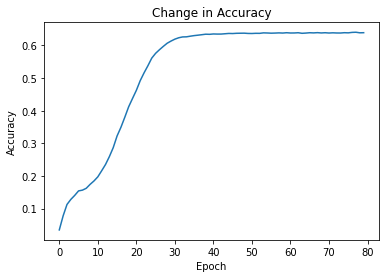

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

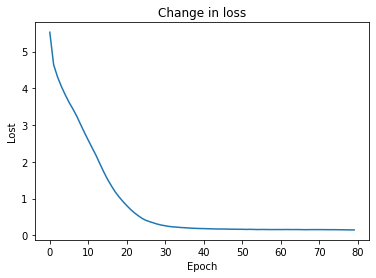

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

row 1
QUESTION: where did you get that
REAL ANSWER: at the on
PREDICTED ANSWER: at the on 

row 2
QUESTION: did she believe you
REAL ANSWER: i have no idea
PREDICTED ANSWER: i have no idea 

row 3
QUESTION: where is boyd
REAL ANSWER: downstairs in the closet
PREDICTED ANSWER: downstairs in the closet 

row 4
QUESTION: what song
REAL ANSWER: you send me
PREDICTED ANSWER: you send me 

row 5
QUESTION: the stone age
REAL ANSWER: the postvegas man
PREDICTED ANSWER: the postvegas man 

row 6
QUESTION: the postvegas man
REAL ANSWER: a mutant species
PREDICTED ANSWER: a mutant species 

row 7
QUESTION: a mutant species
REAL ANSWER: okay boys smile
PREDICTED ANSWER: okay boys smile 

row 8
QUESTION: good times
REAL ANSWER: real times
PREDICTED ANSWER: real times 

row 9
QUESTION: she is dead
REAL ANSWER: it was an accident
PREDICTED ANSWER: yes she is dead 

row 10
QUESTION: shut up micheal
REAL ANSWER: i killed my brother
PREDICTED ANSWER: i killed my brother 

row 11
QUESTION: don
REAL ANSWE

In [ ]:
!cp -r "/content/model_weights_7" "/content/drive/MyDrive/Conversational Chatbot"

### Bleu Score

In [ ]:
!pip install --upgrade bleu

Requirement already up-to-date: bleu in /usr/local/lib/python3.7/dist-packages (0.3)


In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]

In [ ]:
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))

In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

35.74


### Config 8

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 512
rnn_size = 512
batch_size = 1024
num_layers =  1
learning_rate = 0.001
learning_rate_decay = 0.99
min_lr = 0.0001
epochs=50
DISPLAY_STEP=30

In [ ]:
save_path = '/content/model_weights_8/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.85})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.85,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)

100%|██████████| 21/21 [00:13<00:00,  1.53it/s]


Epoch 1,Average_loss 6.076607, Average Accucracy 0.021849
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i <EOS>




100%|██████████| 21/21 [00:11<00:00,  1.78it/s]


Epoch 2,Average_loss 4.902593, Average Accucracy 0.036551
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:12<00:00,  1.72it/s]


Epoch 3,Average_loss 4.675883, Average Accucracy 0.070855
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:12<00:00,  1.64it/s]


Epoch 4,Average_loss 4.454741, Average Accucracy 0.087131
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 5,Average_loss 4.251687, Average Accucracy 0.109902
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 6,Average_loss 4.047211, Average Accucracy 0.120512
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 7,Average_loss 3.867273, Average Accucracy 0.131270
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am fine




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 8,Average_loss 3.700667, Average Accucracy 0.138858
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am fine




100%|██████████| 21/21 [00:12<00:00,  1.62it/s]


Epoch 9,Average_loss 3.528276, Average Accucracy 0.145616
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 10,Average_loss 3.377237, Average Accucracy 0.152848
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 11,Average_loss 3.235925, Average Accucracy 0.159590
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 12,Average_loss 3.068677, Average Accucracy 0.168480
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.58it/s]


Epoch 13,Average_loss 2.926837, Average Accucracy 0.173851
  Inputs Words: ['where', 'are', 'you']
  Replied Words: <UNK> <UNK> <EOS>




100%|██████████| 21/21 [00:12<00:00,  1.62it/s]


Epoch 14,Average_loss 2.737586, Average Accucracy 0.188911
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage reactor <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 15,Average_loss 2.549927, Average Accucracy 0.208124
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage reactor <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 16,Average_loss 2.378456, Average Accucracy 0.224524
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage reactor <EOS>




100%|██████████| 21/21 [00:12<00:00,  1.62it/s]


Epoch 17,Average_loss 2.227710, Average Accucracy 0.238808
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage reactor <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 18,Average_loss 2.106029, Average Accucracy 0.249915
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:12<00:00,  1.62it/s]


Epoch 19,Average_loss 2.042662, Average Accucracy 0.253193
  Inputs Words: ['where', 'are', 'you']
  Replied Words: right here <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 20,Average_loss 1.932027, Average Accucracy 0.264300
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage holiness <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 21,Average_loss 1.829546, Average Accucracy 0.269477
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 22,Average_loss 1.628477, Average Accucracy 0.306300
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 23,Average_loss 1.485037, Average Accucracy 0.332000
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage reactor <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 24,Average_loss 1.351495, Average Accucracy 0.352531
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 25,Average_loss 1.228474, Average Accucracy 0.379162
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 26,Average_loss 1.117332, Average Accucracy 0.403522
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage bedroom <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 27,Average_loss 1.030040, Average Accucracy 0.420162
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 28,Average_loss 0.958801, Average Accucracy 0.437066
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


Epoch 29,Average_loss 0.915824, Average Accucracy 0.447025
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


Epoch 30,Average_loss 0.871764, Average Accucracy 0.454536
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 31,Average_loss 0.824415, Average Accucracy 0.466316
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 32,Average_loss 0.747859, Average Accucracy 0.484422
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 33,Average_loss 0.634771, Average Accucracy 0.518353
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 34,Average_loss 0.547199, Average Accucracy 0.545147
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.56it/s]


Epoch 35,Average_loss 0.504861, Average Accucracy 0.556734
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 36,Average_loss 0.457490, Average Accucracy 0.565422
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 37,Average_loss 0.421355, Average Accucracy 0.575281
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


Epoch 38,Average_loss 0.378413, Average Accucracy 0.591371
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


Epoch 39,Average_loss 0.347138, Average Accucracy 0.600299
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


Epoch 40,Average_loss 0.319265, Average Accucracy 0.608220
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.59it/s]


Epoch 41,Average_loss 0.298371, Average Accucracy 0.614436
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 42,Average_loss 0.287963, Average Accucracy 0.615343
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.60it/s]


Epoch 43,Average_loss 0.274603, Average Accucracy 0.621458
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 44,Average_loss 0.261310, Average Accucracy 0.623543
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 45,Average_loss 0.244230, Average Accucracy 0.626876
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 46,Average_loss 0.227342, Average Accucracy 0.630325
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:12<00:00,  1.62it/s]


Epoch 47,Average_loss 0.211981, Average Accucracy 0.633688
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:12<00:00,  1.62it/s]


Epoch 48,Average_loss 0.202056, Average Accucracy 0.634060
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 49,Average_loss 0.193384, Average Accucracy 0.636548
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.61it/s]


Epoch 50,Average_loss 0.189264, Average Accucracy 0.638548
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




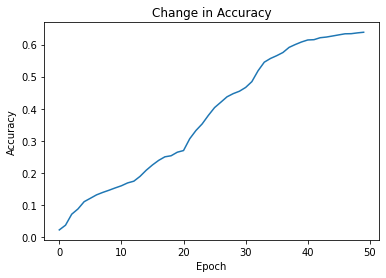

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

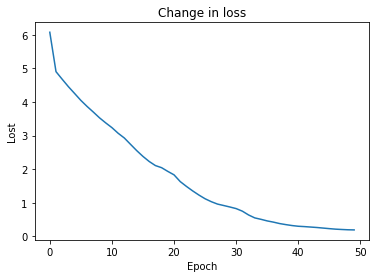

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

Streaming output truncated to the last 5000 lines.
row 25
QUESTION: he telephoned me today
REAL ANSWER: he did
PREDICTED ANSWER: he did 

row 26
QUESTION: when was that
REAL ANSWER: about three
PREDICTED ANSWER: when was beaumont 

row 27
QUESTION: about three
REAL ANSWER: did you go
PREDICTED ANSWER: did you go 

row 28
QUESTION: good morning
REAL ANSWER: good morning lieutenant sorry
PREDICTED ANSWER: good morning bill 

row 29
QUESTION: would not watch me
REAL ANSWER: chris chris
PREDICTED ANSWER: chris chris 

row 30
QUESTION: why you said
REAL ANSWER: never mind
PREDICTED ANSWER: never mind 

row 31
QUESTION: one hundred three
REAL ANSWER: never mind
PREDICTED ANSWER: never mind 

row 32
QUESTION: how are you
REAL ANSWER: hello in
PREDICTED ANSWER: all right son 

row 33
QUESTION: oh nick nick
REAL ANSWER: hello
PREDICTED ANSWER: hello 

row 34
QUESTION: well do not you
REAL ANSWER: you are always teasing
PREDICTED ANSWER: you are always teasing 

row 35
QUESTION: that is that
REA

In [ ]:
!cp -r "/content/model_weights_8" "/content/drive/MyDrive/Conversational Chatbot"

In [ ]:
!pip install --upgrade bleu

Requirement already up-to-date: bleu in /usr/local/lib/python3.7/dist-packages (0.3)


In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]

In [ ]:
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))

In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

38.67


### Config 9

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 1024
rnn_size = 512
batch_size = 1024
num_layers =  1
learning_rate = 0.001
learning_rate_decay = 0.99
min_lr = 0.0001
epochs=50
DISPLAY_STEP=30

In [ ]:
save_path = '/content/model_weights_9/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.9})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.9,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)

100%|██████████| 21/21 [00:15<00:00,  1.33it/s]


Epoch 1,Average_loss 6.041347, Average Accucracy 0.025251
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i <EOS>




100%|██████████| 21/21 [00:12<00:00,  1.62it/s]


Epoch 2,Average_loss 4.839706, Average Accucracy 0.041760
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:13<00:00,  1.58it/s]


Epoch 3,Average_loss 4.574850, Average Accucracy 0.073389
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am not




100%|██████████| 21/21 [00:13<00:00,  1.52it/s]


Epoch 4,Average_loss 4.348972, Average Accucracy 0.082768
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am not




100%|██████████| 21/21 [00:14<00:00,  1.49it/s]


Epoch 5,Average_loss 4.112289, Average Accucracy 0.100811
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am fine




100%|██████████| 21/21 [00:14<00:00,  1.48it/s]


Epoch 6,Average_loss 3.883548, Average Accucracy 0.113460
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.48it/s]


Epoch 7,Average_loss 3.668914, Average Accucracy 0.122954
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am going




100%|██████████| 21/21 [00:14<00:00,  1.48it/s]


Epoch 8,Average_loss 3.463536, Average Accucracy 0.129650
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 9,Average_loss 3.244480, Average Accucracy 0.141493
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 10,Average_loss 3.037465, Average Accucracy 0.153840
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.45it/s]


Epoch 11,Average_loss 2.851575, Average Accucracy 0.164117
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.48it/s]


Epoch 12,Average_loss 2.620703, Average Accucracy 0.179726
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 13,Average_loss 2.385671, Average Accucracy 0.204497
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 14,Average_loss 2.189297, Average Accucracy 0.222796
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am thirsty




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 15,Average_loss 2.020528, Average Accucracy 0.243226
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 16,Average_loss 1.849879, Average Accucracy 0.265881
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 17,Average_loss 1.656443, Average Accucracy 0.296038
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 18,Average_loss 1.481575, Average Accucracy 0.326327
  Inputs Words: ['where', 'are', 'you']
  Replied Words: nowherei amhere <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.48it/s]


Epoch 19,Average_loss 1.352938, Average Accucracy 0.352314
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.48it/s]


Epoch 20,Average_loss 1.222494, Average Accucracy 0.378984
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.48it/s]


Epoch 21,Average_loss 1.071506, Average Accucracy 0.410102
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in the taft




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 22,Average_loss 0.950871, Average Accucracy 0.437957
  Inputs Words: ['where', 'are', 'you']
  Replied Words: closer holiness <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 23,Average_loss 0.866110, Average Accucracy 0.456527
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am everywhere




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 24,Average_loss 0.789920, Average Accucracy 0.470967
  Inputs Words: ['where', 'are', 'you']
  Replied Words: closer than <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 25,Average_loss 0.684459, Average Accucracy 0.500597
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 26,Average_loss 0.610225, Average Accucracy 0.522197
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 27,Average_loss 0.544143, Average Accucracy 0.543116
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in my bed




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 28,Average_loss 0.495499, Average Accucracy 0.554339
  Inputs Words: ['where', 'are', 'you']
  Replied Words: taking looking <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 29,Average_loss 0.446027, Average Accucracy 0.569739
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 30,Average_loss 0.401552, Average Accucracy 0.582031
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


Epoch 31,Average_loss 0.362133, Average Accucracy 0.588580
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 32,Average_loss 0.336071, Average Accucracy 0.596447
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:14<00:00,  1.44it/s]


Epoch 33,Average_loss 0.316616, Average Accucracy 0.599005
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 34,Average_loss 0.288832, Average Accucracy 0.607616
  Inputs Words: ['where', 'are', 'you']
  Replied Words: floating out <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 35,Average_loss 0.263311, Average Accucracy 0.611111
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 36,Average_loss 0.240725, Average Accucracy 0.619001
  Inputs Words: ['where', 'are', 'you']
  Replied Words: floating out <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 37,Average_loss 0.224501, Average Accucracy 0.620326
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 38,Average_loss 0.210599, Average Accucracy 0.623969
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 39,Average_loss 0.202474, Average Accucracy 0.625124
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


Epoch 40,Average_loss 0.195259, Average Accucracy 0.625775
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


Epoch 41,Average_loss 0.187070, Average Accucracy 0.628147
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 42,Average_loss 0.183899, Average Accucracy 0.627077
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 43,Average_loss 0.180948, Average Accucracy 0.629054
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am everywhere




100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


Epoch 44,Average_loss 0.179157, Average Accucracy 0.628340
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


Epoch 45,Average_loss 0.176492, Average Accucracy 0.629813
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 46,Average_loss 0.175401, Average Accucracy 0.629154
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 47,Average_loss 0.173057, Average Accucracy 0.629317
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


Epoch 48,Average_loss 0.169764, Average Accucracy 0.630487
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


Epoch 49,Average_loss 0.166737, Average Accucracy 0.629674
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:14<00:00,  1.46it/s]


Epoch 50,Average_loss 0.165538, Average Accucracy 0.629790
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




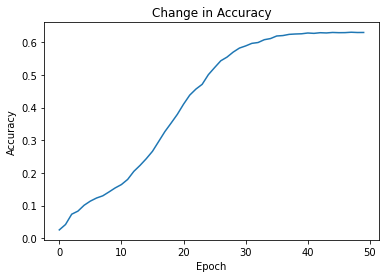

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

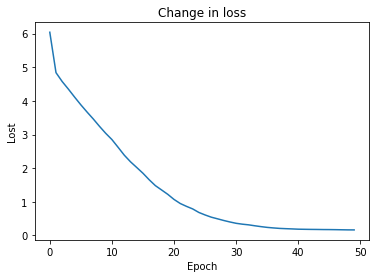

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

Streaming output truncated to the last 5000 lines.
row 25
QUESTION: he telephoned me today
REAL ANSWER: he did
PREDICTED ANSWER: he did 

row 26
QUESTION: when was that
REAL ANSWER: about three
PREDICTED ANSWER: when was seventeen 

row 27
QUESTION: about three
REAL ANSWER: did you go
PREDICTED ANSWER: did you go 

row 28
QUESTION: good morning
REAL ANSWER: good morning lieutenant sorry
PREDICTED ANSWER: good morning bill 

row 29
QUESTION: would not watch me
REAL ANSWER: chris chris
PREDICTED ANSWER: chris chris 

row 30
QUESTION: why you said
REAL ANSWER: never mind
PREDICTED ANSWER: never mind 

row 31
QUESTION: one hundred three
REAL ANSWER: never mind
PREDICTED ANSWER: never mind 

row 32
QUESTION: how are you
REAL ANSWER: hello in
PREDICTED ANSWER: i am okay 

row 33
QUESTION: oh nick nick
REAL ANSWER: hello
PREDICTED ANSWER: hello 

row 34
QUESTION: well do not you
REAL ANSWER: you are always teasing
PREDICTED ANSWER: you are always teasing 

row 35
QUESTION: that is that
REAL A

In [ ]:
!cp -r "/content/model_weights_9" "/content/drive/MyDrive/Conversational Chatbot"

In [ ]:
!pip install --upgrade bleu

  Created wheel for bleu: filename=bleu-0.3-cp37-none-any.whl size=5802 sha256=4fc97ea2bcfe365086519746ce7019b6b00ce8554ce033d72833a8807bd769e0
  Stored in directory: /root/.cache/pip/wheels/a9/95/e7/cb43a1c509c38fedbee6223963e34a51a94d8991f3b3e1888e
  Created wheel for efficiency: filename=efficiency-0.5-cp37-none-any.whl size=20285 sha256=2b5c509ac8df84c983e817e8d9b51fc972043196c908100d7909afddea0fdbaa
  Stored in directory: /root/.cache/pip/wheels/94/fd/e6/2d34e80768fb2d001fc35b033a48114b1afdb6ea020b4cb2c7
Successfully built bleu efficiency


In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))

In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

38.77


### Config 10

In [ ]:
target_vocab_size = len(answers_vocabs)
source_vocab_size = len(questions_vocabs)
vocab_size = len(index_to_vocabs)+1
embed_size = 2048
rnn_size = 1024
batch_size = 1024
num_layers =  1
learning_rate = 0.001
learning_rate_decay = 0.99
min_lr = 0.0001
epochs=50
DISPLAY_STEP=30

In [ ]:
save_path = '/content/model_weights_10/model_saver'
acc_plt = []
loss_plt = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        total_accuracy = 0.0
        total_loss = 0.0
        for bs in tqdm(range(0,round_no  ,batch_size)):
          index = min(bs+batch_size, round_no )
      
          #padding done seperately for each batch in training and testing data
          batch_x,len_x = pad_sentence(train_data[bs:index],pad_int)
          batch_y,len_y = pad_sentence(test_data[bs:index],pad_int)
          batch_x = np.array(batch_x)
          batch_y = np.array(batch_y)
        
          pred,loss_f,opt = sess.run([inference_logits,cost,train_op], 
                                      feed_dict={input_data:batch_x,
                                                target_data:batch_y,
                                                input_data_len:len_x,
                                                target_data_len:len_y,
                                                lr_rate:learning_rate,
                                                keep_prob:0.9})

          train_acc = get_accuracy(batch_y, pred)
          total_loss += loss_f 
          total_accuracy+=train_acc
    
        total_accuracy /= (round_no // batch_size)
    
        total_loss /=  (round_no//batch_size)
        acc_plt.append(total_accuracy)
        loss_plt.append(total_loss)
        prediction_logits = sess.run(inference_logits, {input_data: [question_sentence]*batch_size,
                                         input_data_len: [len(question_sentence)]*batch_size,
                                         target_data_len: [len(question_sentence)]*batch_size,              
                                         keep_prob: 0.9,
                                         })[0]
        print('Epoch %d,Average_loss %f, Average Accucracy %f'%(epoch+1,total_loss,total_accuracy))
        print('  Inputs Words: {}'.format([index_to_vocabs[i] for i in question_sentence]))
        print('  Replied Words: {}'.format(" ".join([index_to_vocabs[i] for i in prediction_logits])))
        print('\n')
        saver = tf.train.Saver() 
        saver.save(sess, save_path)

100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 1,Average_loss 5.860271, Average Accucracy 0.044147
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:40<00:00,  1.93s/it]


Epoch 2,Average_loss 4.608224, Average Accucracy 0.071258
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am <EOS>




100%|██████████| 21/21 [00:41<00:00,  1.98s/it]


Epoch 3,Average_loss 4.272117, Average Accucracy 0.083744
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am fine




100%|██████████| 21/21 [00:42<00:00,  2.02s/it]


Epoch 4,Average_loss 3.924026, Average Accucracy 0.094153
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am going




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 5,Average_loss 3.537332, Average Accucracy 0.111204
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 6,Average_loss 3.114129, Average Accucracy 0.128697
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:41<00:00,  2.00s/it]


Epoch 7,Average_loss 2.655349, Average Accucracy 0.158009
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 8,Average_loss 2.182185, Average Accucracy 0.204063
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 9,Average_loss 1.799177, Average Accucracy 0.257510
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 10,Average_loss 1.416218, Average Accucracy 0.321367
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 11,Average_loss 1.086486, Average Accucracy 0.391881
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:42<00:00,  2.02s/it]


Epoch 12,Average_loss 0.856694, Average Accucracy 0.445987
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in the bed




100%|██████████| 21/21 [00:42<00:00,  2.03s/it]


Epoch 13,Average_loss 0.707868, Average Accucracy 0.482414
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in the taft




100%|██████████| 21/21 [00:42<00:00,  2.02s/it]


Epoch 14,Average_loss 0.532040, Average Accucracy 0.527848
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:42<00:00,  2.02s/it]


Epoch 15,Average_loss 0.401192, Average Accucracy 0.568390
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:42<00:00,  2.02s/it]


Epoch 16,Average_loss 0.322271, Average Accucracy 0.590603
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in my bed




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 17,Average_loss 0.276509, Average Accucracy 0.599485
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 18,Average_loss 0.244567, Average Accucracy 0.609476
  Inputs Words: ['where', 'are', 'you']
  Replied Words: closer than <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 19,Average_loss 0.223011, Average Accucracy 0.611220
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am everywhere




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 20,Average_loss 0.205843, Average Accucracy 0.616133
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am everywhere




100%|██████████| 21/21 [00:42<00:00,  2.02s/it]


Epoch 21,Average_loss 0.196902, Average Accucracy 0.615258
  Inputs Words: ['where', 'are', 'you']
  Replied Words: floating to catalina




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 22,Average_loss 0.188953, Average Accucracy 0.618118
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 23,Average_loss 0.184587, Average Accucracy 0.619079
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 24,Average_loss 0.179215, Average Accucracy 0.619024
  Inputs Words: ['where', 'are', 'you']
  Replied Words: closer than <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 25,Average_loss 0.175214, Average Accucracy 0.619040
  Inputs Words: ['where', 'are', 'you']
  Replied Words: we are by




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 26,Average_loss 0.172293, Average Accucracy 0.621218
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 27,Average_loss 0.169053, Average Accucracy 0.620675
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:41<00:00,  1.99s/it]


Epoch 28,Average_loss 0.165151, Average Accucracy 0.622923
  Inputs Words: ['where', 'are', 'you']
  Replied Words: i am here




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 29,Average_loss 0.162813, Average Accucracy 0.623272
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 30,Average_loss 0.159625, Average Accucracy 0.623310
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 31,Average_loss 0.158789, Average Accucracy 0.623496
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 32,Average_loss 0.156276, Average Accucracy 0.624837
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 33,Average_loss 0.154036, Average Accucracy 0.624736
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 34,Average_loss 0.154030, Average Accucracy 0.625054
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.02s/it]


Epoch 35,Average_loss 0.151358, Average Accucracy 0.624682
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:41<00:00,  2.00s/it]


Epoch 36,Average_loss 0.150301, Average Accucracy 0.626155
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 37,Average_loss 0.148198, Average Accucracy 0.625403
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 38,Average_loss 0.147259, Average Accucracy 0.627147
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 39,Average_loss 0.142934, Average Accucracy 0.628402
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:41<00:00,  2.00s/it]


Epoch 40,Average_loss 0.142460, Average Accucracy 0.627294
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 41,Average_loss 0.140448, Average Accucracy 0.629968
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 42,Average_loss 0.140141, Average Accucracy 0.629108
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 43,Average_loss 0.138511, Average Accucracy 0.629829
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 44,Average_loss 0.137812, Average Accucracy 0.629604
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


Epoch 45,Average_loss 0.137231, Average Accucracy 0.630534
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:41<00:00,  2.00s/it]


Epoch 46,Average_loss 0.136847, Average Accucracy 0.630418
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 47,Average_loss 0.135272, Average Accucracy 0.630790
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 48,Average_loss 0.133105, Average Accucracy 0.632332
  Inputs Words: ['where', 'are', 'you']
  Replied Words: in here <EOS>




100%|██████████| 21/21 [00:42<00:00,  2.01s/it]


Epoch 49,Average_loss 0.132366, Average Accucracy 0.633502
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




100%|██████████| 21/21 [00:41<00:00,  2.00s/it]


Epoch 50,Average_loss 0.130972, Average Accucracy 0.634479
  Inputs Words: ['where', 'are', 'you']
  Replied Words: foodstorage room <EOS>




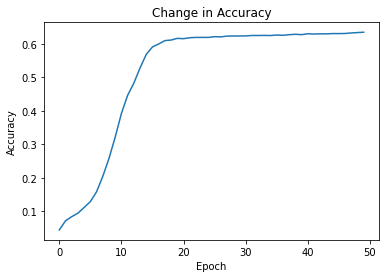

In [ ]:
#Accuracy vs Epochs
plt.plot(range(epochs),acc_plt)
plt.title("Change in Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

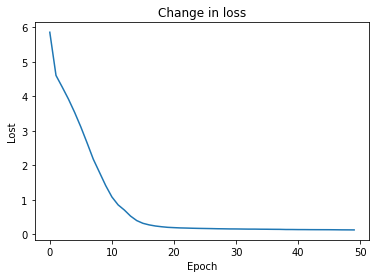

In [ ]:
#loss vs Epochs
plt.plot(range(epochs),loss_plt)
plt.title("Change in loss")
plt.xlabel('Epoch')
plt.ylabel('Lost')
plt.show()

In [ ]:
#get all the codes/tokens we additionaly added in the vocab dictionary
garbage = []
for code in codes:
  print(vocabs_to_index[code])
  garbage.append(vocabs_to_index[code])

6283
6284
6285
6286


In [ ]:
#prepare the question,answer and prediction data
def print_data(i,batch_x,index_to_vocabs):
  data = []
  for n in batch_x[i]:
    if n==garbage[1]:
      break
    else:
      if n not in [6283,6285,6286]:
        data.append(index_to_vocabs[n])
  return data

In [ ]:
ques = []
real_answer = []
pred_answer = []
for i in range(len(val_batch_x)):
  ques.append(print_data(i,batch_x,index_to_vocabs))
  real_answer.append(print_data(i,batch_y,index_to_vocabs))
  pred_answer.append(print_data(i,pred,index_to_vocabs))

In [ ]:
for i in range(len(val_batch_x)):
    print('row %d'%(i+1))
    print('QUESTION:',' '.join(ques[i]))
    print('REAL ANSWER:',' '.join(real_answer[i]))
    print('PREDICTED ANSWER:',' '.join(pred_answer[i]),'\n')

Streaming output truncated to the last 5000 lines.
row 25
QUESTION: he telephoned me today
REAL ANSWER: he did
PREDICTED ANSWER: he did 

row 26
QUESTION: when was that
REAL ANSWER: about three
PREDICTED ANSWER: about three 

row 27
QUESTION: about three
REAL ANSWER: did you go
PREDICTED ANSWER: did you go 

row 28
QUESTION: good morning
REAL ANSWER: good morning lieutenant sorry
PREDICTED ANSWER: are not you 

row 29
QUESTION: would not watch me
REAL ANSWER: chris chris
PREDICTED ANSWER: chris chris 

row 30
QUESTION: why you said
REAL ANSWER: never mind
PREDICTED ANSWER: never mind 

row 31
QUESTION: one hundred three
REAL ANSWER: never mind
PREDICTED ANSWER: never mind 

row 32
QUESTION: how are you
REAL ANSWER: hello in
PREDICTED ANSWER: i am okay 

row 33
QUESTION: oh nick nick
REAL ANSWER: hello
PREDICTED ANSWER: hello 

row 34
QUESTION: well do not you
REAL ANSWER: you are always teasing
PREDICTED ANSWER: you are always teasing 

row 35
QUESTION: that is that
REAL ANSWER: this i

In [ ]:
!cp -r "/content/model_weights_10" "/content/drive/MyDrive/Conversational Chatbot"

In [ ]:
!pip install --upgrade bleu

Requirement already up-to-date: bleu in /usr/local/lib/python3.7/dist-packages (0.3)


In [ ]:
pred=[[' '.join(i)]for i in pred_answer]
real=[[' '.join(i)]for i in real_answer]
from bleu import list_bleu
scores=[]
for i in range(len(val_batch_x)):
  scores.append(list_bleu(pred[i],real[i]))

In [ ]:
from statistics import mean
avg=mean(scores)
print(round(avg,2))

39.06
